In [60]:
import glob
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN

# UMA with speed at 22.22 m/s

In [61]:
traj01 = pd.read_csv('UE0_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj02 = pd.read_csv('UE0_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj03 = pd.read_csv('UE1_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj04 = pd.read_csv('UE1_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj05 = pd.read_csv('UE2_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj06 = pd.read_csv('UE2_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj07 = pd.read_csv('UE3_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj08 = pd.read_csv('UE3_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj09 = pd.read_csv('UE4_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj10 = pd.read_csv('UE4_18-11-2021_23-38-11.csv', low_memory=False,  header=None)

In [62]:
traj01.columns = ["X", "Y", "Speed", "Time"]
traj02.columns = ["X", "Y", "Speed", "Time"]
traj03.columns = ["X", "Y", "Speed", "Time"]
traj04.columns = ["X", "Y", "Speed", "Time"]
traj05.columns = ["X", "Y", "Speed", "Time"]
traj06.columns = ["X", "Y", "Speed", "Time"]
traj07.columns = ["X", "Y", "Speed", "Time"]
traj08.columns = ["X", "Y", "Speed", "Time"]
traj09.columns = ["X", "Y", "Speed", "Time"]
traj10.columns = ["X", "Y", "Speed", "Time"]


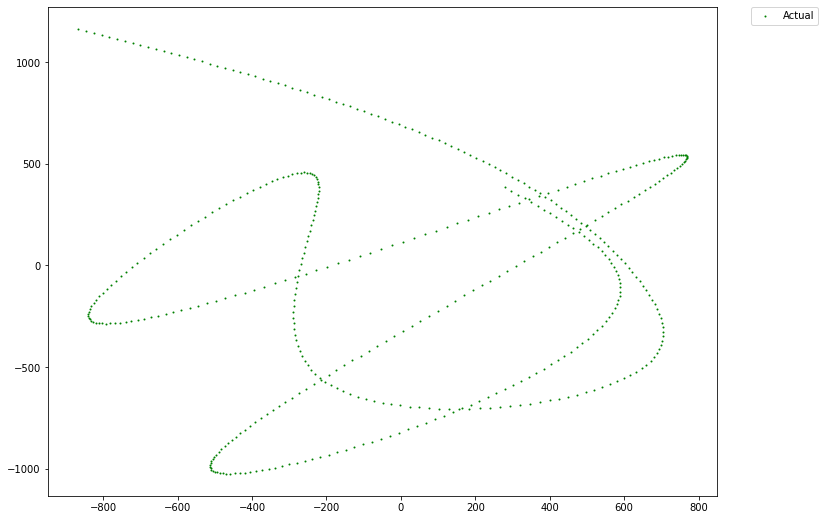

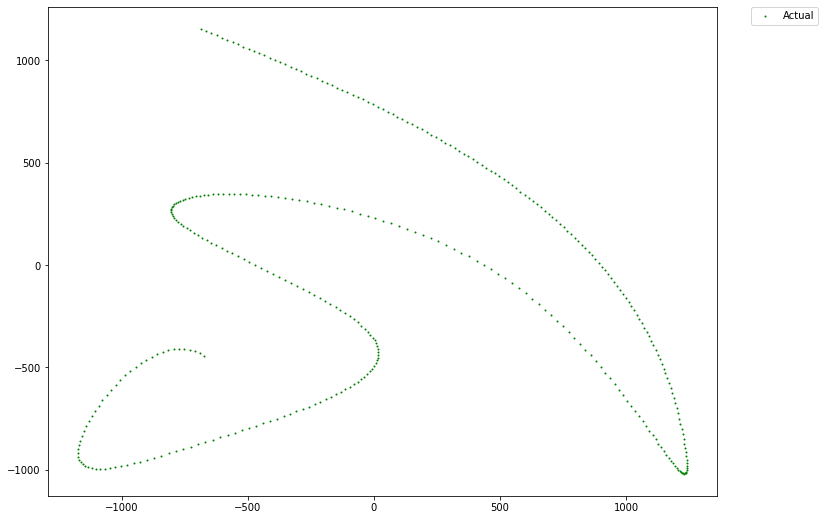

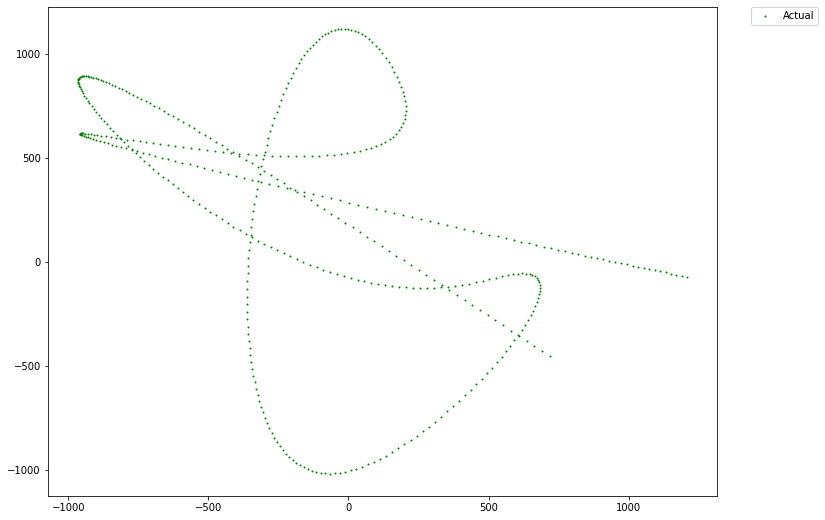

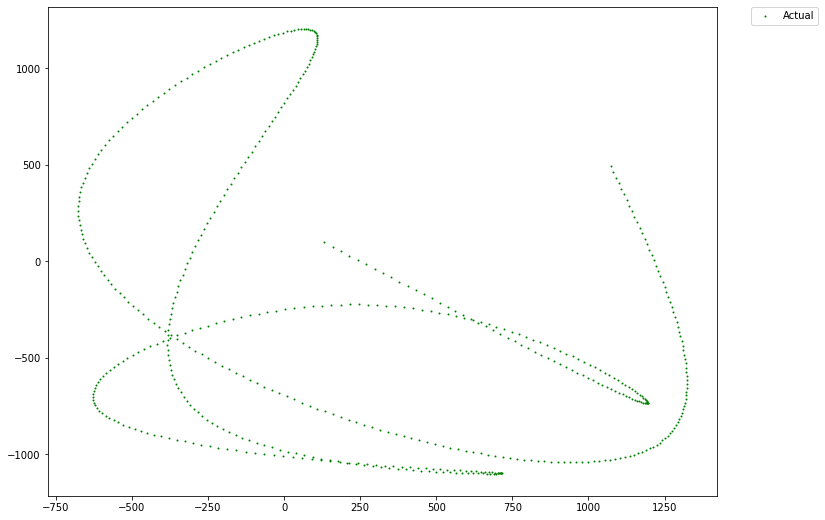

In [63]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj01['X'],traj01['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj03['X'],traj03['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj06['X'],traj06['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj10['X'],traj10['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [64]:
new_df_1 = traj01
new_df_2 = traj02
new_df_3 = traj03
new_df_4 = traj04
new_df_5 = traj05
new_df_6 = traj06
new_df_7 = traj07
new_df_8 = traj08
new_df_9 = traj09
new_df_10 = traj10


#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df_1[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


# load dataset
dataset = new_df_7[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler7 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler7.fit_transform(values)
# frame as supervised learning
reframed_7 = series_to_supervised(scaled, 1, 1)

print(reframed_7.head())

# load dataset
dataset = new_df_8[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler8 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler8.fit_transform(values)
# frame as supervised learning
reframed_8 = series_to_supervised(scaled, 1, 1)
print(reframed_8.head())

# load dataset
dataset = new_df_9[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler9 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler9.fit_transform(values)
# frame as supervised learning
reframed_9 = series_to_supervised(scaled, 1, 1)
print(reframed_9.head())

# load dataset
dataset = new_df_10[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler10 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler10.fit_transform(values)
# frame as supervised learning
reframed_10 = series_to_supervised(scaled, 1, 1)
print(reframed_10.head())

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000   1.000000 -0.974398  0.990944
2  -0.974398   0.990944 -0.948799  0.981885
3  -0.948799   0.981885 -0.923207  0.972821
4  -0.923207   0.972821 -0.897626  0.963747
5  -0.897626   0.963747 -0.872060  0.954661
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.966739 -0.995142
2   0.966739  -0.995142  0.933490 -0.990278
3   0.933490  -0.990278  0.900268 -0.985404
4   0.900268  -0.985404  0.867084 -0.980514
5   0.867084  -0.980514  0.833951 -0.975604
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.596960   1.000000 -0.579516  0.990049
2  -0.579516   0.990049 -0.562075  0.980097
3  -0.562075   0.980097 -0.544637  0.970140
4  -0.544637   0.970140 -0.527204  0.960179
5  -0.527204   0.960179 -0.509779  0.950209
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000  -0.697563 -0.970668 -0.706060
2  -0.970668  -0.706060 -0.941347 -0.714551
3  -0.941347  -0.714551 -0.912046 

In [5]:
new_df_1 = traj01
new_df_2 = traj02
new_df_3 = traj03
new_df_4 = traj04
new_df_5 = traj05
new_df_6 = traj06
new_df_7 = traj07
new_df_8 = traj08
new_df_9 = traj09
new_df_10 = traj10


#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df_1[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 5, 3)
print("   Feature Varables       Target Varables")
print(reframed.head())


# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 5, 3)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 5, 3)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 5, 3)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 5, 3)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 5, 3)
print(reframed_6.head())


# load dataset
dataset = new_df_7[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler7 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler7.fit_transform(values)
# frame as supervised learning
reframed_7 = series_to_supervised(scaled, 5, 3)

print(reframed_7.head())

# load dataset
dataset = new_df_8[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler8 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler8.fit_transform(values)
# frame as supervised learning
reframed_8 = series_to_supervised(scaled, 5, 3)
print(reframed_8.head())

# load dataset
dataset = new_df_9[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler9 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler9.fit_transform(values)
# frame as supervised learning
reframed_9 = series_to_supervised(scaled, 5, 3)
print(reframed_9.head())

# load dataset
dataset = new_df_10[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler10 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler10.fit_transform(values)
# frame as supervised learning
reframed_10 = series_to_supervised(scaled, 5, 3)
print(reframed_10.head())

   Feature Varables       Target Varables
   var1(t-5)  var2(t-5)  var1(t-4)  var2(t-4)  var1(t-3)  var2(t-3)  \
5  -1.000000   1.000000  -0.974398   0.990944  -0.948799   0.981885   
6  -0.974398   0.990944  -0.948799   0.981885  -0.923207   0.972821   
7  -0.948799   0.981885  -0.923207   0.972821  -0.897626   0.963747   
8  -0.923207   0.972821  -0.897626   0.963747  -0.872060   0.954661   
9  -0.897626   0.963747  -0.872060   0.954661  -0.846511   0.945561   

   var1(t-2)  var2(t-2)  var1(t-1)  var2(t-1)   var1(t)   var2(t)  var1(t+1)  \
5  -0.923207   0.972821  -0.897626   0.963747 -0.872060  0.954661  -0.846511   
6  -0.897626   0.963747  -0.872060   0.954661 -0.846511  0.945561  -0.820984   
7  -0.872060   0.954661  -0.846511   0.945561 -0.820984  0.936442  -0.795482   
8  -0.846511   0.945561  -0.820984   0.936442 -0.795482  0.927303  -0.770009   
9  -0.820984   0.936442  -0.795482   0.927303 -0.770009  0.918140  -0.744568   

   var2(t+1)  var1(t+2)  var2(t+2)  
5   0.945561 

In [23]:
reframed_8.shape

(387, 16)

In [6]:
frames = [reframed, reframed_2, reframed_3,reframed_4,reframed_5,reframed_6,reframed_7,reframed_8,reframed_9,reframed_10]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

var1(t-5)  var2(t-5)  var1(t-4)  var2(t-4)  var1(t-3)  var2(t-3)  \
5189   0.844642   0.105376   0.836347   0.130219   0.827952   0.155147   
5190   0.836347   0.130219   0.827952   0.155147   0.819468   0.180150   
5191   0.827952   0.155147   0.819468   0.180150   0.810903   0.205220   
5192   0.819468   0.180150   0.810903   0.205220   0.802267   0.230350   
5193   0.810903   0.205220   0.802267   0.230350   0.793571   0.255532   

      var1(t-2)  var2(t-2)  var1(t-1)  var2(t-1)   var1(t)   var2(t)  \
5189   0.819468   0.180150   0.810903   0.205220  0.802267  0.230350   
5190   0.810903   0.205220   0.802267   0.230350  0.793571  0.255532   
5191   0.802267   0.230350   0.793571   0.255532  0.784823  0.280756   
5192   0.793571   0.255532   0.784823   0.280756  0.776034  0.306016   
5193   0.784823   0.280756   0.776034   0.306016  0.767212  0.331303   

      var1(t+1)  var2(t+1)  var1(t+2)  var2(t+2)  
5189   0.793571   0.255532   0.784823   0.280756  
5190   0.784823   0.280756   0.776034   0.306016  
5191   0.776034   0.306016   0.767212   0.331303  
5192   0.767212   0.331303   0.758368   0.356608  
5193   0.758368   0.356608   0.749511   0.381925

In [24]:
# split into train and test sets
values = reframed.values
n_train = round(reframed.shape[0]*0.2)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-2], train[:, 2:]
test_X, test_y = test[:, :-2], test[:, 2:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1051, 1, 2) (1051, 2) (4203, 1, 2) (4203, 2)


In [38]:
# split into train and test sets
values = reframed.values
n_train = round(reframed.shape[0]*0.2)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-6], train[:, 10:]
test_X, test_y = test[:, :-6], test[:, 10:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(1039, 1, 10) (1039, 6) (4155, 1, 10) (4155, 6)


In [37]:
train[:, :-6].shape,train[:, 10:].shape

((1039, 10), (1039, 6))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                19968     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 11)                715       
Total params: 20,683
Trainable params: 20,683
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
15/15 - 16s - loss: 0.4328 - accuracy: 0.2502 - val_loss: 0.4902 - val_accuracy: 0.1357
Epoch 2/600
15/15 - 0s - loss: 0.4121 - accuracy: 0.1838 - val_loss: 0.4644 - val_accuracy: 0.0852
Epoch 3/600
15/15 - 0s - loss: 0.3882 - accuracy: 0.0895 - val_loss: 0.4315 - val_accuracy: 0.0335
Epoch 4/600
15/15 - 0s - loss: 0.3570 - accuracy: 0.0741 - val_loss: 0.3864 - val_

Epoch 76/600
15/15 - 0s - loss: 0.0447 - accuracy: 0.4158 - val_loss: 0.0297 - val_accuracy: 0.4510
Epoch 77/600
15/15 - 0s - loss: 0.0449 - accuracy: 0.4264 - val_loss: 0.0298 - val_accuracy: 0.4445
Epoch 78/600
15/15 - 0s - loss: 0.0451 - accuracy: 0.3956 - val_loss: 0.0316 - val_accuracy: 0.4262
Epoch 79/600
15/15 - 0s - loss: 0.0448 - accuracy: 0.3898 - val_loss: 0.0275 - val_accuracy: 0.4414
Epoch 80/600
15/15 - 0s - loss: 0.0448 - accuracy: 0.3773 - val_loss: 0.0308 - val_accuracy: 0.3844
Epoch 81/600
15/15 - 0s - loss: 0.0441 - accuracy: 0.3773 - val_loss: 0.0298 - val_accuracy: 0.4477
Epoch 82/600
15/15 - 0s - loss: 0.0451 - accuracy: 0.3840 - val_loss: 0.0288 - val_accuracy: 0.4414
Epoch 83/600
15/15 - 0s - loss: 0.0442 - accuracy: 0.4042 - val_loss: 0.0290 - val_accuracy: 0.4190
Epoch 84/600
15/15 - 0s - loss: 0.0434 - accuracy: 0.3696 - val_loss: 0.0292 - val_accuracy: 0.4647
Epoch 85/600
15/15 - 0s - loss: 0.0441 - accuracy: 0.4331 - val_loss: 0.0289 - val_accuracy: 0.4621


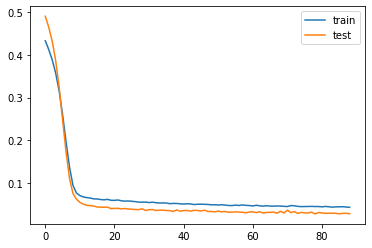

In [13]:
# design single LSTM network
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto', patience=10,restore_best_weights=True)
model1 = Sequential()
model1.add(LSTM(64,activation='relu' ,input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(Dropout(0.1))
model1.add(Dense(test_y.shape[1]))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
model1.summary()
# fit network
history1 = model1.fit(train_X, train_y, epochs=600, callbacks=[callback], batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


Epoch 1/600
15/15 - 4s - loss: 0.3871 - accuracy: 0.2454 - val_loss: 0.3740 - val_accuracy: 0.3408
Epoch 2/600
15/15 - 0s - loss: 0.2614 - accuracy: 0.2907 - val_loss: 0.2162 - val_accuracy: 0.3071
Epoch 3/600
15/15 - 0s - loss: 0.1178 - accuracy: 0.2926 - val_loss: 0.0720 - val_accuracy: 0.2756
Epoch 4/600
15/15 - 0s - loss: 0.0680 - accuracy: 0.4110 - val_loss: 0.0695 - val_accuracy: 0.4238
Epoch 5/600
15/15 - 0s - loss: 0.0623 - accuracy: 0.5332 - val_loss: 0.0710 - val_accuracy: 0.4835
Epoch 6/600
15/15 - 0s - loss: 0.0581 - accuracy: 0.3782 - val_loss: 0.0672 - val_accuracy: 0.2498
Epoch 7/600
15/15 - 0s - loss: 0.0589 - accuracy: 0.5024 - val_loss: 0.0684 - val_accuracy: 0.4895
Epoch 8/600
15/15 - 0s - loss: 0.0562 - accuracy: 0.4264 - val_loss: 0.0661 - val_accuracy: 0.3312
Epoch 9/600
15/15 - 0s - loss: 0.0580 - accuracy: 0.4543 - val_loss: 0.0672 - val_accuracy: 0.4895
Epoch 10/600
15/15 - 0s - loss: 0.0558 - accuracy: 0.4928 - val_loss: 0.0656 - val_accuracy: 0.5045
Epoch 11/

15/15 - 0s - loss: 0.0209 - accuracy: 0.6593 - val_loss: 0.0168 - val_accuracy: 0.6549
Epoch 84/600
15/15 - 0s - loss: 0.0204 - accuracy: 0.6468 - val_loss: 0.0167 - val_accuracy: 0.6693
Epoch 85/600
15/15 - 0s - loss: 0.0195 - accuracy: 0.6583 - val_loss: 0.0172 - val_accuracy: 0.6659
Epoch 86/600
15/15 - 0s - loss: 0.0187 - accuracy: 0.7036 - val_loss: 0.0161 - val_accuracy: 0.6881
Epoch 87/600
15/15 - 0s - loss: 0.0200 - accuracy: 0.6795 - val_loss: 0.0182 - val_accuracy: 0.6606
Epoch 88/600
15/15 - 0s - loss: 0.0222 - accuracy: 0.7132 - val_loss: 0.0181 - val_accuracy: 0.6698
Epoch 89/600
15/15 - 0s - loss: 0.0205 - accuracy: 0.6997 - val_loss: 0.0167 - val_accuracy: 0.6785
Epoch 90/600
15/15 - 0s - loss: 0.0198 - accuracy: 0.7305 - val_loss: 0.0169 - val_accuracy: 0.6761
Epoch 91/600
15/15 - 0s - loss: 0.0190 - accuracy: 0.6689 - val_loss: 0.0156 - val_accuracy: 0.6809
Epoch 92/600
15/15 - 0s - loss: 0.0191 - accuracy: 0.7036 - val_loss: 0.0134 - val_accuracy: 0.6922
Epoch 93/600


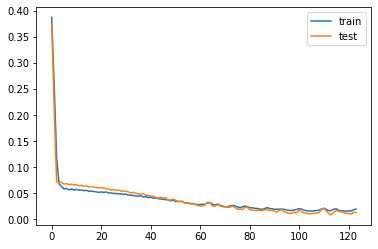

In [39]:
from keras.layers import Bidirectional

# design network
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto', patience=10,restore_best_weights=True)
model1 = Sequential()
model1.add(Bidirectional(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2]))))
model1.add(Dropout(0.1))
model1.add(Dense(test_y.shape[1]))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])

# fit network
history1 = model1.fit(train_X, train_y, epochs=600, callbacks=[callback], batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [40]:
yhat = model1.predict(test_X)
Loss, accuracy = model1.evaluate(test_X, test_y)
print('Accuracy: %.4f' % (accuracy*100))

# calculate Loss
print('Loss: %.6f' % Loss)

130/130 [==============================] - 0s 802us/step - loss: 0.0081 - accuracy: 0.8383
Accuracy: 83.8267
Loss: 0.008135


In [53]:
array1 = np.arange(8).reshape(2,4)
array2 = np.arange(2)
array1 = np.column_stack((array1, array2))
print(array1)

[[0 1 2 3 0]
 [4 5 6 7 1]]


In [57]:
array2 = np.arange(4)
array2

array([0, 1, 2, 3])

In [49]:
test_X

import numpy as np


arr =  np.column_stack((test_X, yhat))

print(arr)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [44]:
yhat = model1.predict(test_X)
yhat

array([[-0.24266954,  0.79107016, -0.23245801,  0.7862705 , -0.21511193,
         0.7704299 ],
       [-0.22570926,  0.78106344, -0.2154673 ,  0.77610993, -0.1981951 ,
         0.76032794],
       [-0.2087833 ,  0.7710038 , -0.19851567,  0.765898  , -0.1813212 ,
         0.7501762 ],
       ...,
       [ 0.778183  ,  0.2852263 ,  0.76405764,  0.30281094,  0.75477415,
         0.30658188],
       [ 0.770007  ,  0.31055698,  0.75574213,  0.32810757,  0.74649197,
         0.33142915],
       [ 0.7617916 ,  0.33590358,  0.747397  ,  0.35341462,  0.7381938 ,
         0.3562773 ]], dtype=float32)

In [42]:
# make a prediction
yhat = model1.predict(test_X)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)

# make a prediction
yhat2 = model1.predict(train_X)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmseL = rmse
print('Test RMSE: %.6f' % rmse)

# invert scaling for forecast
inv_yhat2 = scaler.inverse_transform(yhat2)
# invert scaling for actual
inv_y2 = scaler.inverse_transform(train_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Train RMSE: %.6f' % rmse)

import numpy as np
inv_f = np.concatenate((inv_yhat2, inv_yhat), axis=0)
inv_f

inv_o = np.concatenate((inv_y2, inv_y), axis=0)
inv_f,inv_o

ValueError: operands could not be broadcast together with shapes (4155,6) (2,) (4155,6) 

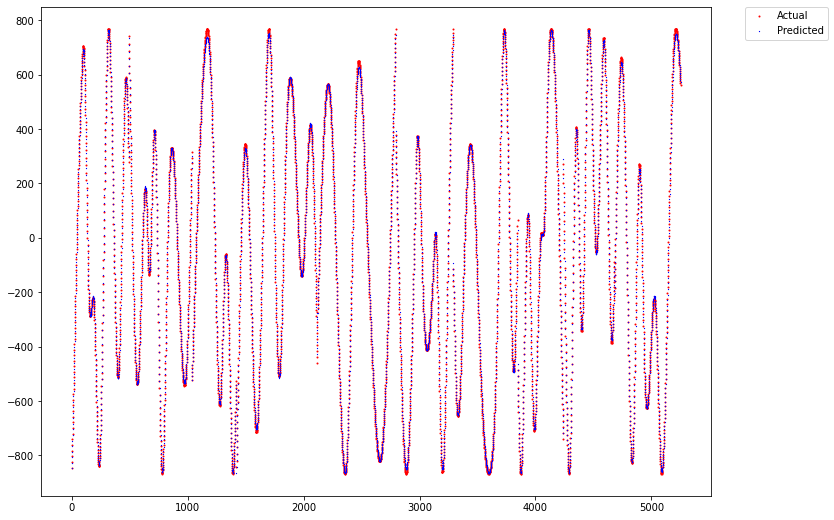

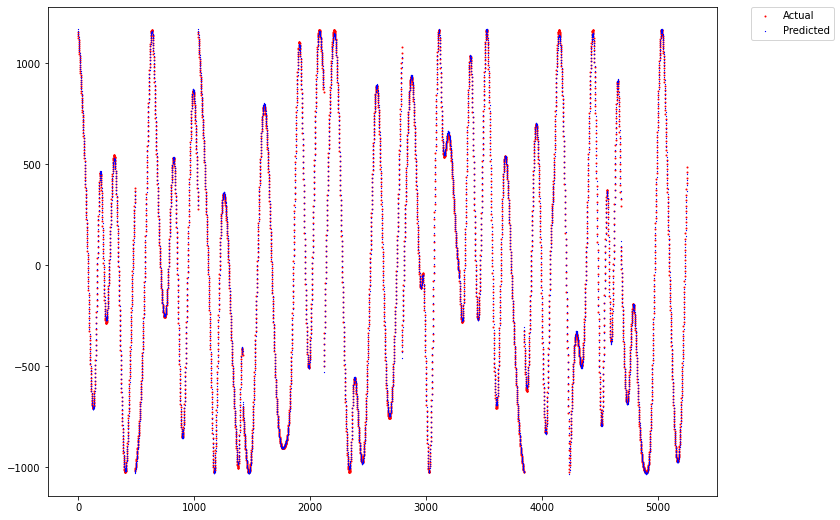

RMSE for X in Train dataset: 14.201216
RMSE for Y in Train dataset: 16.821520
RMSE for X in Test dataset: 16.323591
RMSE for Y in Test dataset: 20.417036


In [28]:
fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,0], inv_yhat2[:,0]))
print('RMSE for X in Train dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,1], inv_yhat2[:,1]))
print('RMSE for Y in Train dataset: %.6f' % rmse)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('RMSE for X in Test dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('RMSE for Y in Test dataset: %.6f' % rmse)

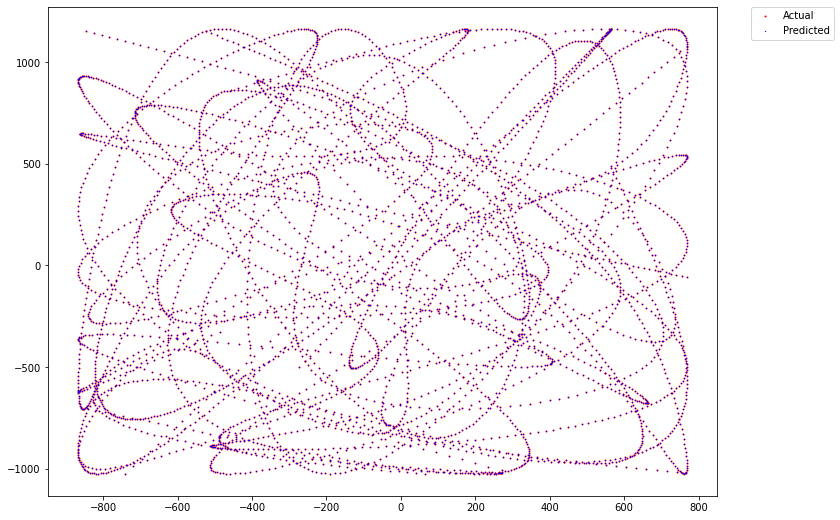

In [29]:

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Feed random 6 paths to ML for predicting

In [30]:
traj11 = pd.read_csv('UE5_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj12 = pd.read_csv('UE5_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj13 = pd.read_csv('UE6_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj14 = pd.read_csv('UE7_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj15 = pd.read_csv('UE8_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj16 = pd.read_csv('UE9_18-11-2021_23-37-17.csv', low_memory=False,  header=None)

traj11.columns = ["X", "Y", "Speed", "Time"]
traj12.columns = ["X", "Y", "Speed", "Time"]
traj13.columns = ["X", "Y", "Speed", "Time"]
traj14.columns = ["X", "Y", "Speed", "Time"]
traj15.columns = ["X", "Y", "Speed", "Time"]
traj16.columns = ["X", "Y", "Speed", "Time"]

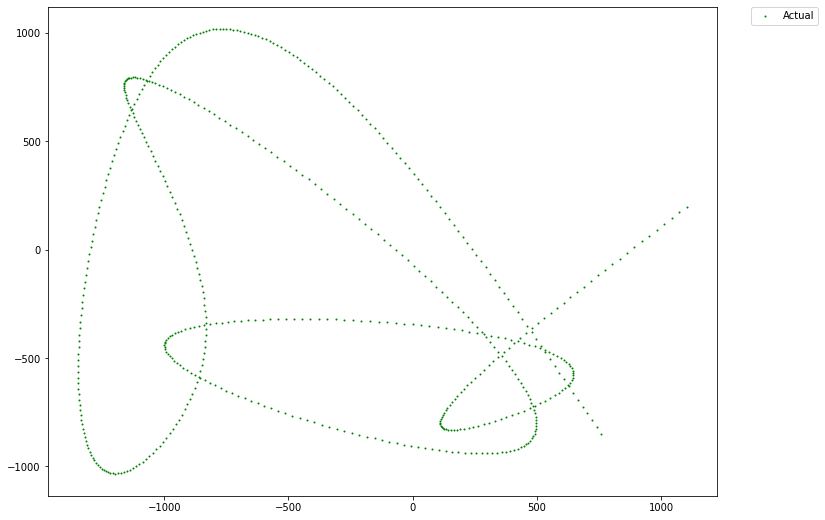

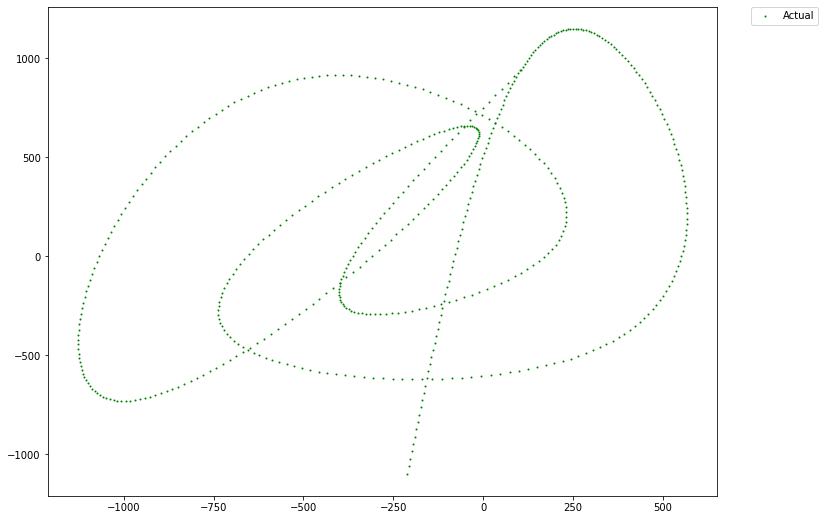

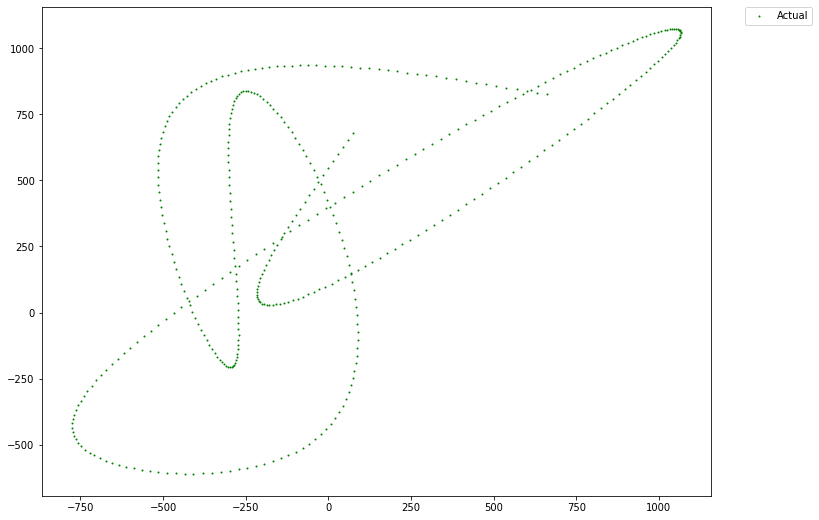

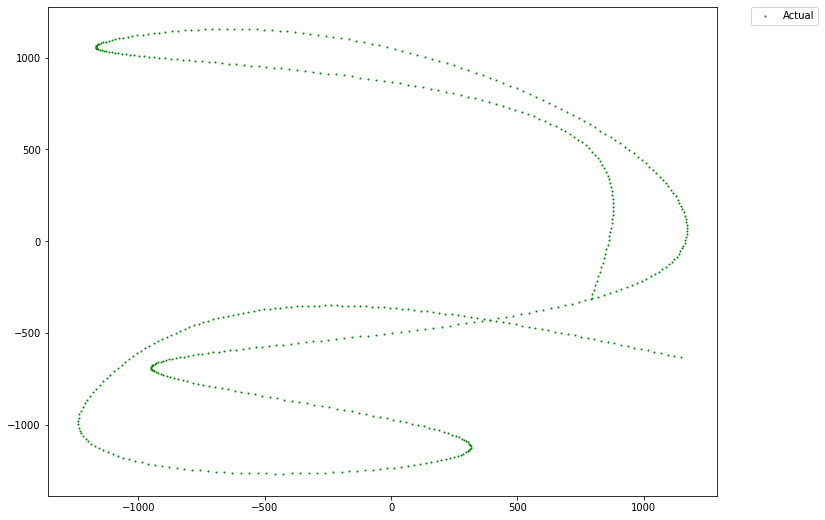

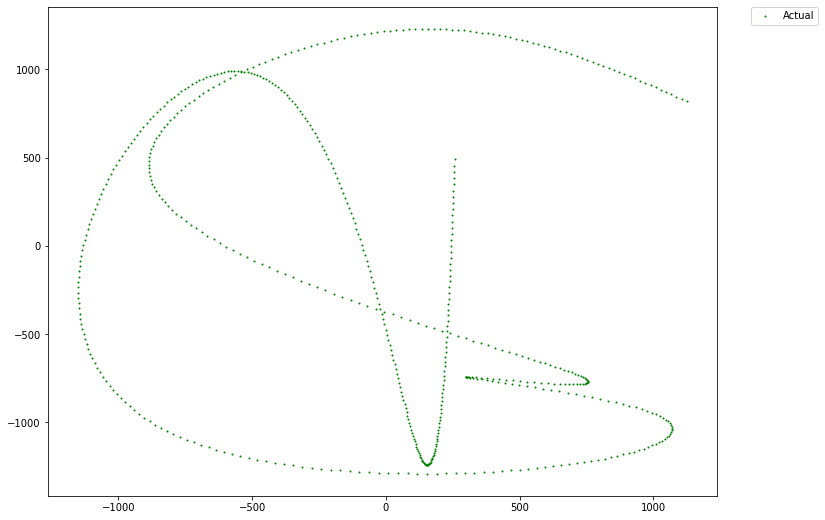

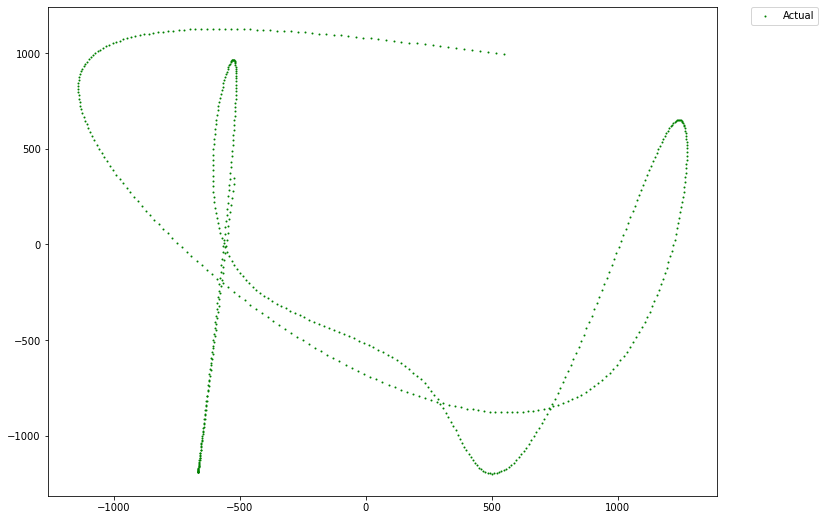

In [31]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj11['X'],traj11['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj12['X'],traj12['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj13['X'],traj13['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj14['X'],traj14['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj15['X'],traj15['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj16['X'],traj16['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [32]:
new_df = traj11


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000   0.200176  0.975183  0.174007
2   0.975183   0.174007  0.950387  0.147853
3   0.950387   0.147853  0.925633  0.121731
4   0.925633   0.121731  0.900940  0.095657
5   0.900940   0.095657  0.876330  0.069645


Test RMSE: 20.392048


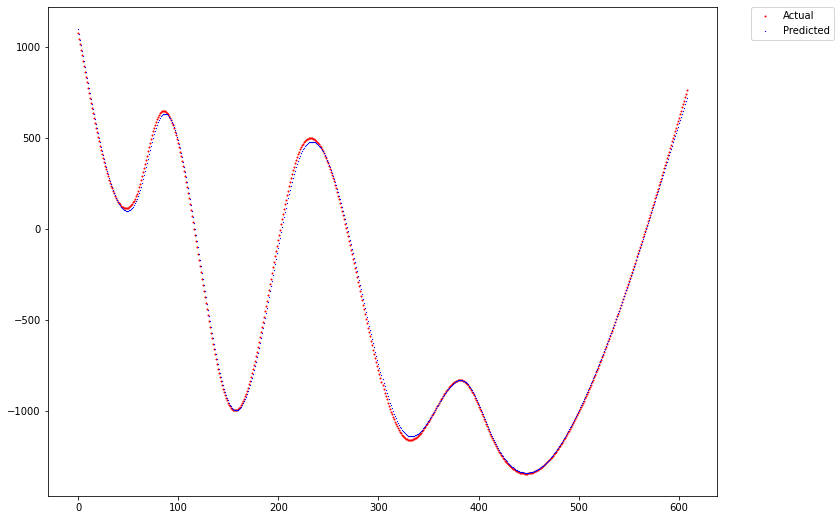

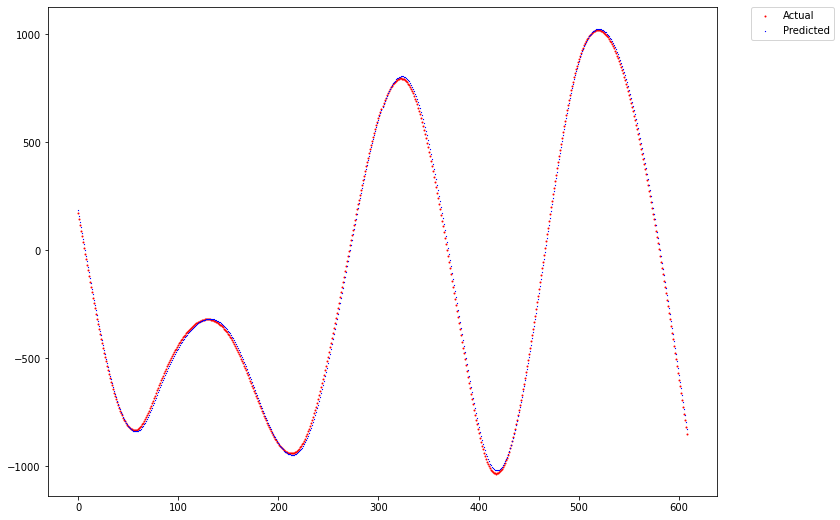

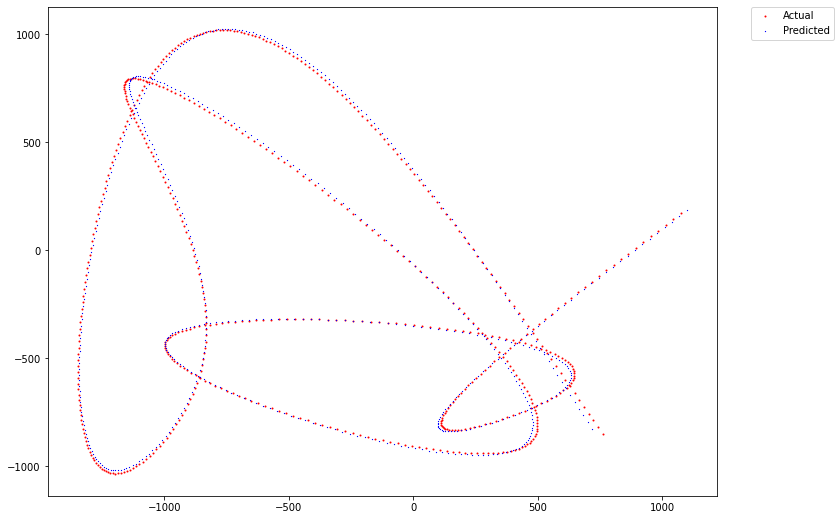

In [33]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [34]:
new_df_2 = traj12
new_df_3 = traj13
new_df_4 = traj14
new_df_5 = traj15
new_df_6 = traj16



#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


frames = [reframed_2, reframed_3,reframed_4,reframed_5,reframed_6]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.081409  -1.000000  0.086339 -0.966866
2   0.086339  -0.966866  0.091270 -0.933739
3   0.091270  -0.933739  0.096202 -0.900629
4   0.096202  -0.900629  0.101137 -0.867543
5   0.101137  -0.867543  0.106076 -0.834490
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.077416   0.531574 -0.093930  0.499692
2  -0.093930   0.499692 -0.110405  0.467860
3  -0.110405   0.467860 -0.126799  0.436123
4  -0.126799   0.436123 -0.143072  0.404533
5  -0.143072   0.404533 -0.159184  0.373136
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.683459  -0.213799  0.688666 -0.193381
2   0.688666  -0.193381  0.693849 -0.172972
3   0.693849  -0.172972  0.698986 -0.152582
4   0.698986  -0.152582  0.704053 -0.132221
5   0.704053  -0.132221  0.709027 -0.111898
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000   0.674301  0.982962  0.684702
2   0.982962   0.684702  0.965921  0.695094
3   0.965921   0.695094  0.948874  0.705466
4   0.948874   0.705466  0.93181

var1(t-1)  var2(t-1)   var1(t)   var2(t)
2805  -0.500758   0.175112 -0.497961  0.206239
2806  -0.497961   0.206239 -0.495158  0.237437
2807  -0.495158   0.237437 -0.492351  0.268690
2808  -0.492351   0.268690 -0.489539  0.299983
2809  -0.489539   0.299983 -0.486725  0.331301

Test RMSE: 20.084332


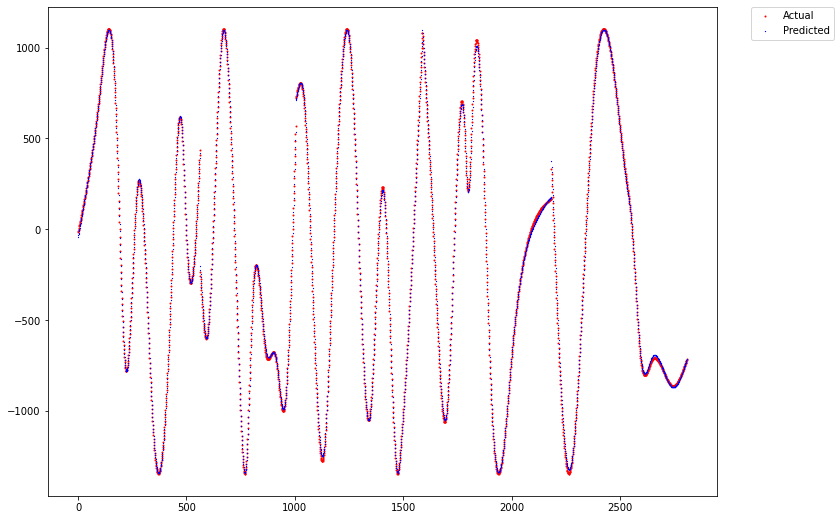

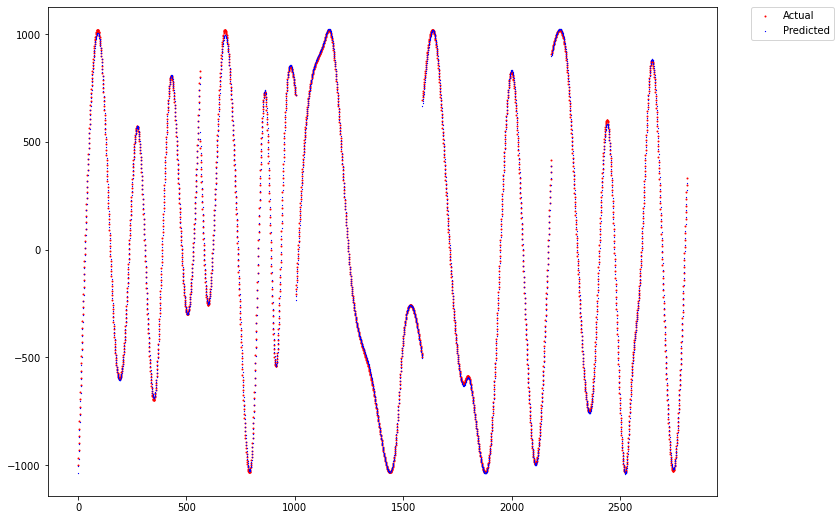

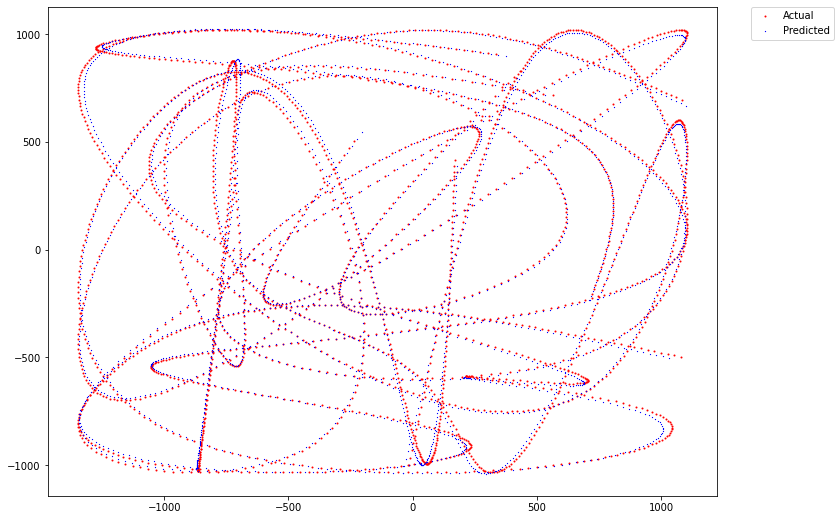

In [35]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# UMI with the speed at 11.11 m/s

In [54]:
traj01 = pd.read_csv('UE0_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj02 = pd.read_csv('UE0_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj03 = pd.read_csv('UE1_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj04 = pd.read_csv('UE1_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj05 = pd.read_csv('UE2_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj06 = pd.read_csv('UE2_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj07 = pd.read_csv('UE3_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj08 = pd.read_csv('UE3_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj09 = pd.read_csv('UE4_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj10 = pd.read_csv('UE4_18-11-2021_23-40-49.csv', low_memory=False,  header=None)

traj01.columns = ["X", "Y", "Speed", "Time"]
traj02.columns = ["X", "Y", "Speed", "Time"]
traj03.columns = ["X", "Y", "Speed", "Time"]
traj04.columns = ["X", "Y", "Speed", "Time"]
traj05.columns = ["X", "Y", "Speed", "Time"]
traj06.columns = ["X", "Y", "Speed", "Time"]
traj07.columns = ["X", "Y", "Speed", "Time"]
traj08.columns = ["X", "Y", "Speed", "Time"]
traj09.columns = ["X", "Y", "Speed", "Time"]
traj10.columns = ["X", "Y", "Speed", "Time"]


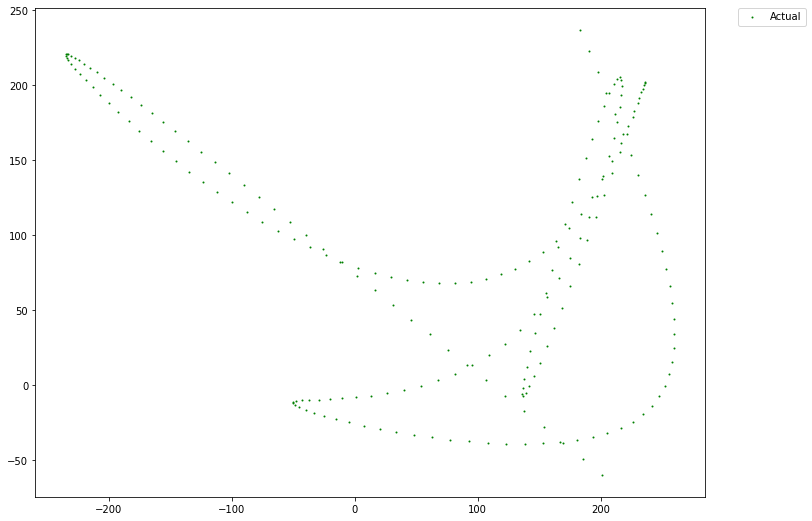

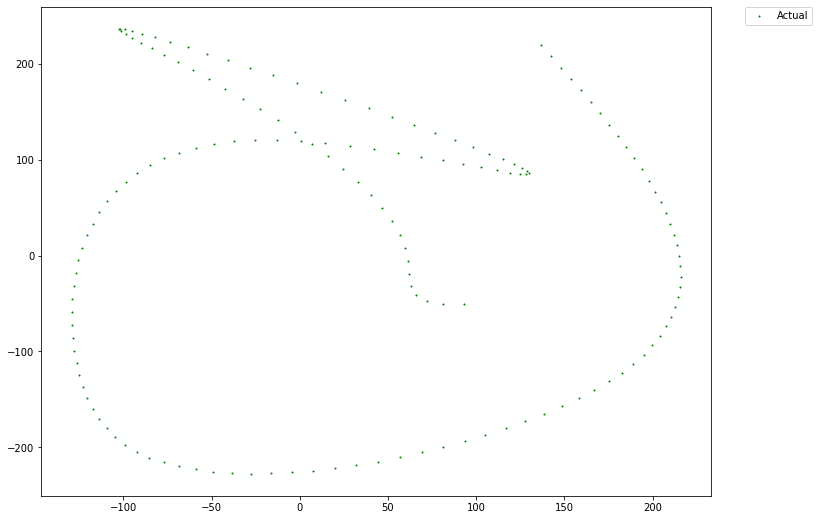

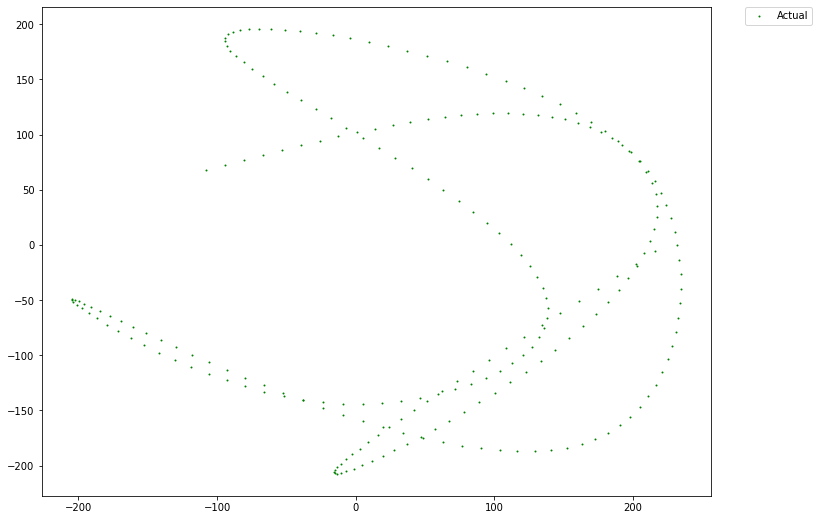

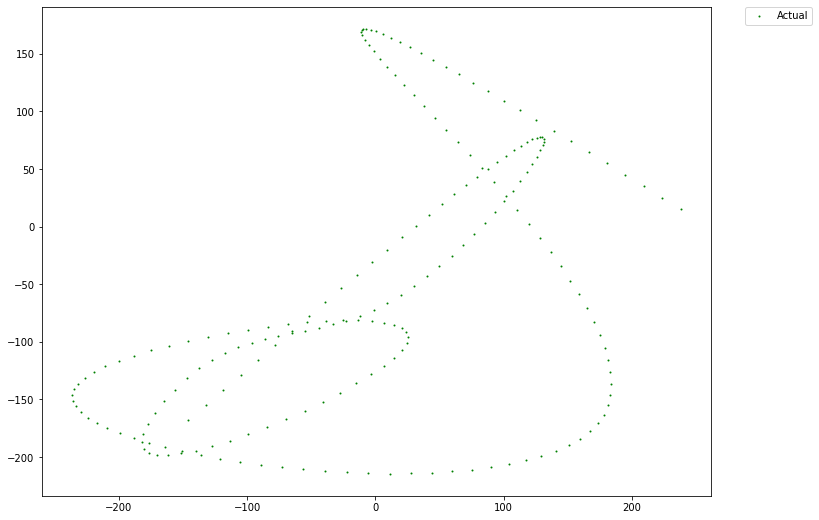

In [55]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj01['X'],traj01['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj03['X'],traj03['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj06['X'],traj06['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj10['X'],traj10['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [56]:
new_df_1 = traj01
new_df_2 = traj02
new_df_3 = traj03
new_df_4 = traj04
new_df_5 = traj05
new_df_6 = traj06
new_df_7 = traj07
new_df_8 = traj08
new_df_9 = traj09
new_df_10 = traj10


#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df_1[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


# load dataset
dataset = new_df_7[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler7 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler7.fit_transform(values)
# frame as supervised learning
reframed_7 = series_to_supervised(scaled, 1, 1)

print(reframed_7.head())

# load dataset
dataset = new_df_8[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler8 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler8.fit_transform(values)
# frame as supervised learning
reframed_8 = series_to_supervised(scaled, 1, 1)
print(reframed_8.head())

# load dataset
dataset = new_df_9[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler9 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler9.fit_transform(values)
# frame as supervised learning
reframed_9 = series_to_supervised(scaled, 1, 1)
print(reframed_9.head())

# load dataset
dataset = new_df_10[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler10 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler10.fit_transform(values)
# frame as supervised learning
reframed_10 = series_to_supervised(scaled, 1, 1)
print(reframed_10.head())

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.689602   1.000000  0.718718  0.904976
2   0.718718   0.904976  0.747605  0.810178
3   0.747605   0.810178  0.776035  0.715830
4   0.776035   0.715830  0.803779  0.622159
5   0.803779   0.622159  0.830609  0.529390
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.170231   1.000000 -0.204094  0.925770
2  -0.204094   0.925770 -0.237765  0.851716
3  -0.237765   0.851716 -0.271053  0.778013
4  -0.271053   0.778013 -0.303767  0.704837
5  -0.303767   0.704837 -0.335716  0.632363
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.542566   0.928570  0.575578  0.877084
2   0.575578   0.877084  0.608437  0.825623
3   0.608437   0.825623  0.640990  0.774211
4   0.640990   0.774211  0.673083  0.722873
5   0.673083   0.722873  0.704564  0.671634
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -0.243938  0.932273 -0.228657
2   0.932273  -0.228657  0.865270 -0.213161
3   0.865270  -0.213161  0.799713 

In [57]:
frames = [reframed, reframed_2, reframed_3,reframed_4,reframed_5,reframed_6,reframed_7,reframed_8,reframed_9,reframed_10]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

var1(t-1)  var2(t-1)   var1(t)   var2(t)
2057  -0.332549  -0.422214 -0.388708 -0.488554
2058  -0.388708  -0.488554 -0.445393 -0.555631
2059  -0.445393  -0.555631 -0.502484 -0.623275
2060  -0.502484  -0.623275 -0.559860 -0.691320
2061  -0.559860  -0.691320 -0.617401 -0.759597

In [58]:
# split into train and test sets
values = reframed.values
n_train = round(reframed.shape[0]*0.2)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-2], train[:, 2:]
test_X, test_y = test[:, :-2], test[:, 2:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(412, 1, 2) (412, 2) (1650, 1, 2) (1650, 2)


Epoch 1/600
6/6 - 8s - loss: 0.4907 - accuracy: 0.6990 - val_loss: 0.4779 - val_accuracy: 0.8085
Epoch 2/600
6/6 - 0s - loss: 0.4640 - accuracy: 0.8350 - val_loss: 0.4528 - val_accuracy: 0.8448
Epoch 3/600
6/6 - 0s - loss: 0.4380 - accuracy: 0.8981 - val_loss: 0.4273 - val_accuracy: 0.8418
Epoch 4/600
6/6 - 0s - loss: 0.4114 - accuracy: 0.8932 - val_loss: 0.4010 - val_accuracy: 0.8418
Epoch 5/600
6/6 - 0s - loss: 0.3842 - accuracy: 0.9029 - val_loss: 0.3738 - val_accuracy: 0.8406
Epoch 6/600
6/6 - 0s - loss: 0.3548 - accuracy: 0.9029 - val_loss: 0.3452 - val_accuracy: 0.8448
Epoch 7/600
6/6 - 0s - loss: 0.3256 - accuracy: 0.9053 - val_loss: 0.3153 - val_accuracy: 0.8455
Epoch 8/600
6/6 - 0s - loss: 0.2931 - accuracy: 0.9053 - val_loss: 0.2837 - val_accuracy: 0.8479
Epoch 9/600
6/6 - 0s - loss: 0.2594 - accuracy: 0.9102 - val_loss: 0.2504 - val_accuracy: 0.8521
Epoch 10/600
6/6 - 0s - loss: 0.2253 - accuracy: 0.9175 - val_loss: 0.2156 - val_accuracy: 0.8576
Epoch 11/600
6/6 - 0s - loss:

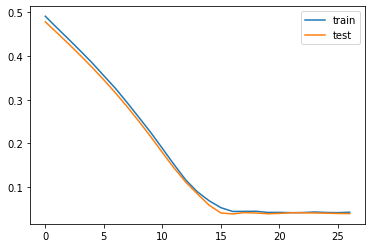

In [59]:
from keras.layers import Bidirectional

# design network
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto', patience=10,restore_best_weights=True)
model1 = Sequential()
model1.add(Bidirectional(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2]))))
model1.add(Dropout(0.1))
model1.add(Dense(test_y.shape[1]))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])

# fit network
history1 = model1.fit(train_X, train_y, epochs=600, callbacks=[callback], batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [60]:
yhat = model1.predict(test_X)
Loss, accuracy = model1.evaluate(test_X, test_y)
print('Accuracy: %.4f' % (accuracy*100))

# calculate Loss
print('Loss: %.6f' % Loss)

52/52 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9667
Accuracy: 96.6667
Loss: 0.038939


In [61]:
# make a prediction
yhat = model1.predict(test_X)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)

# make a prediction
yhat2 = model1.predict(train_X)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmseL = rmse
print('Test RMSE: %.6f' % rmse)

# invert scaling for forecast
inv_yhat2 = scaler.inverse_transform(yhat2)
# invert scaling for actual
inv_y2 = scaler.inverse_transform(train_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Train RMSE: %.6f' % rmse)



Test RMSE: 9.610334
Train RMSE: 9.512330


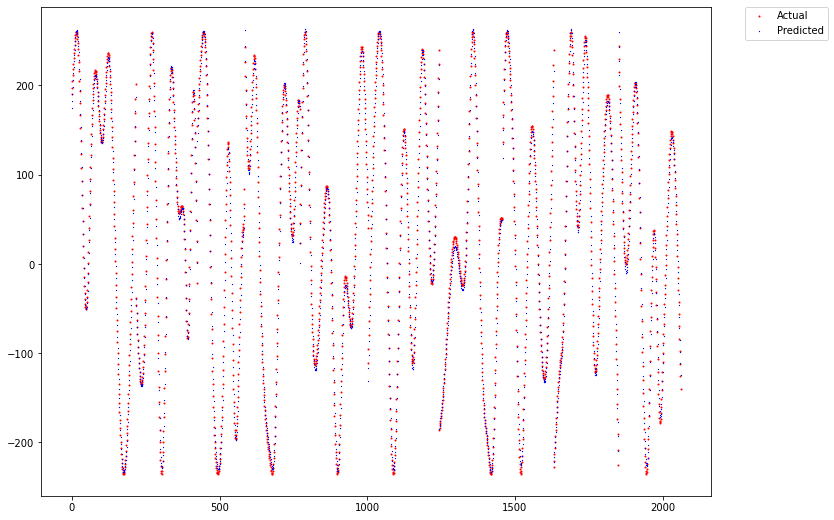

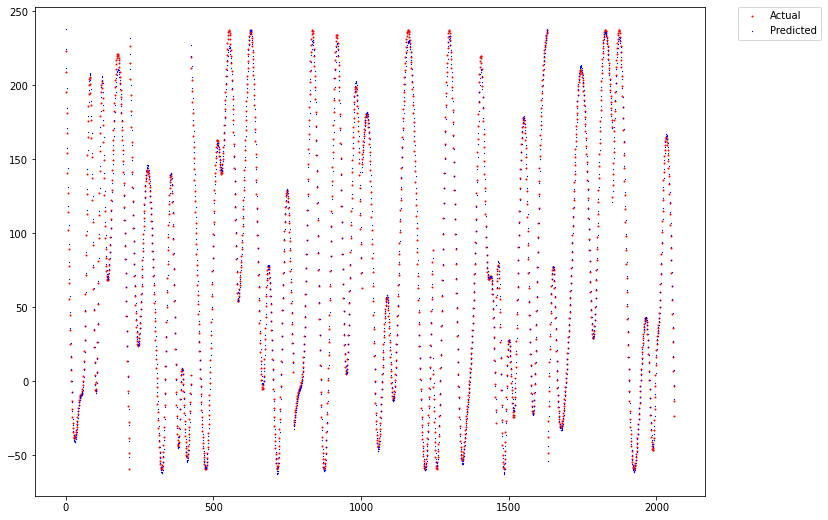

In [62]:
import numpy as np
inv_f = np.concatenate((inv_yhat2, inv_yhat), axis=0)
inv_f

inv_o = np.concatenate((inv_y2, inv_y), axis=0)
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

RMSE for X in Train dataset: 10.893008
RMSE for Y in Train dataset: 7.893743
RMSE for X in Test dataset: 12.026486
RMSE for Y in Test dataset: 6.330932


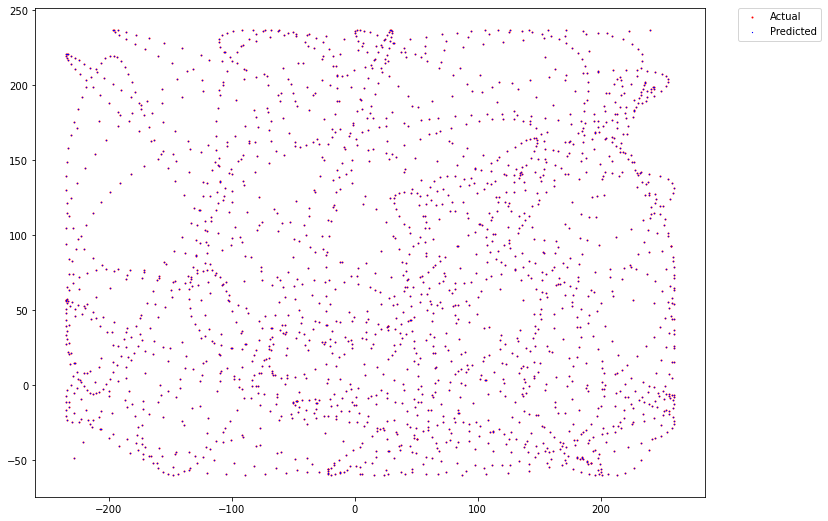

In [63]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,0], inv_yhat2[:,0]))
print('RMSE for X in Train dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,1], inv_yhat2[:,1]))
print('RMSE for Y in Train dataset: %.6f' % rmse)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('RMSE for X in Test dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('RMSE for Y in Test dataset: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Feed random 6 paths to ML for predicting

In [64]:
traj11 = pd.read_csv('UE5_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj12 = pd.read_csv('UE5_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj13 = pd.read_csv('UE6_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj14 = pd.read_csv('UE7_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj15 = pd.read_csv('UE8_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj16 = pd.read_csv('UE9_18-11-2021_23-40-28.csv', low_memory=False,  header=None)

traj11.columns = ["X", "Y", "Speed", "Time"]
traj12.columns = ["X", "Y", "Speed", "Time"]
traj13.columns = ["X", "Y", "Speed", "Time"]
traj14.columns = ["X", "Y", "Speed", "Time"]
traj15.columns = ["X", "Y", "Speed", "Time"]
traj16.columns = ["X", "Y", "Speed", "Time"]

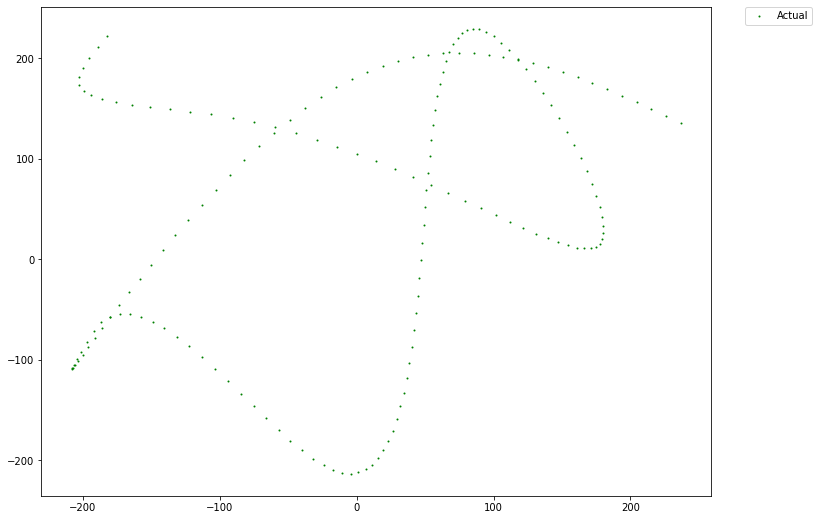

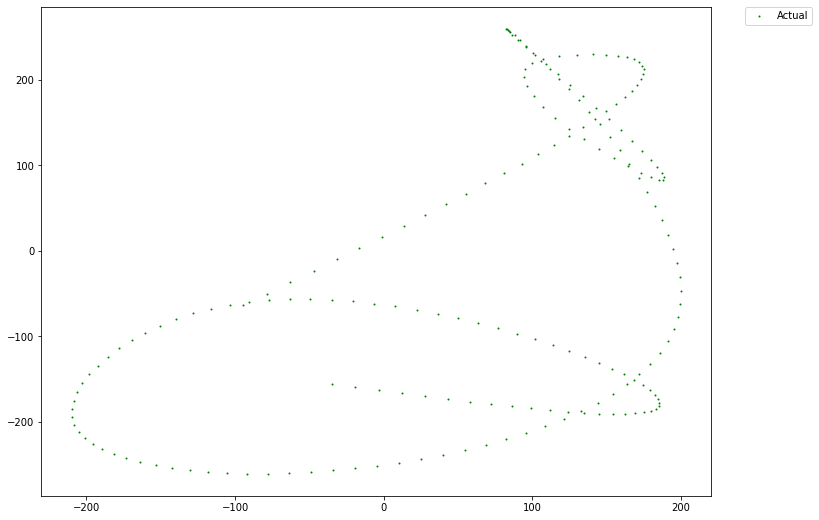

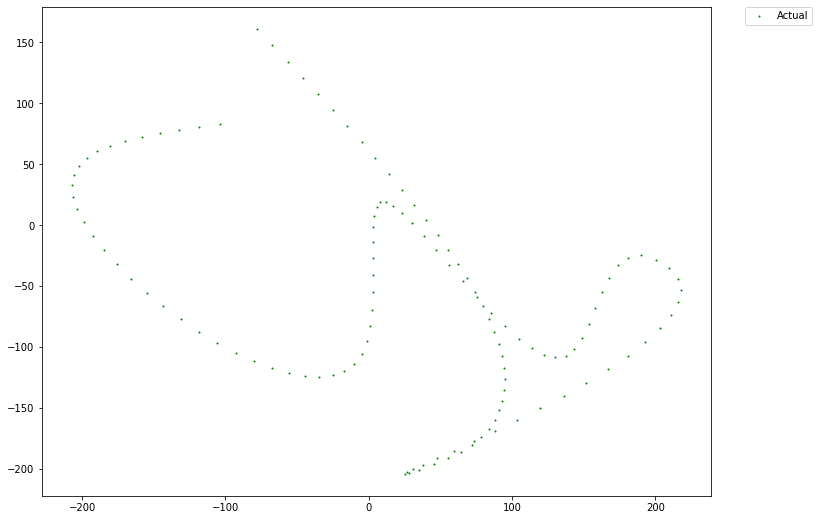

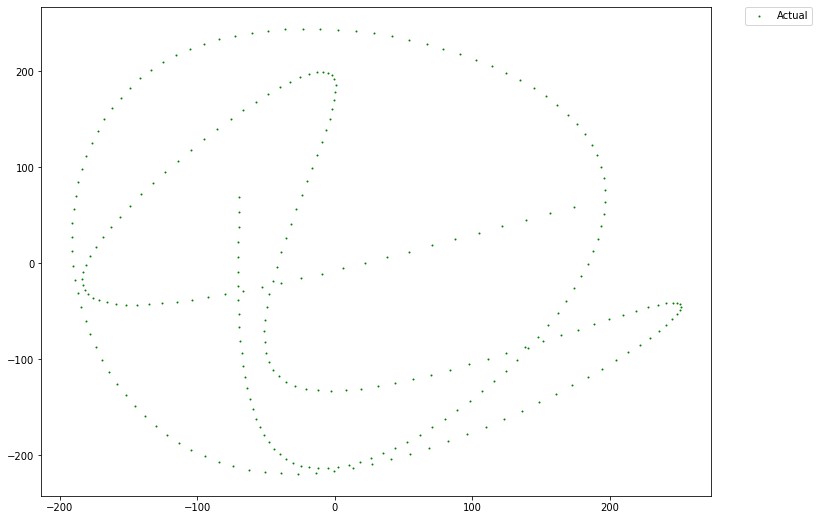

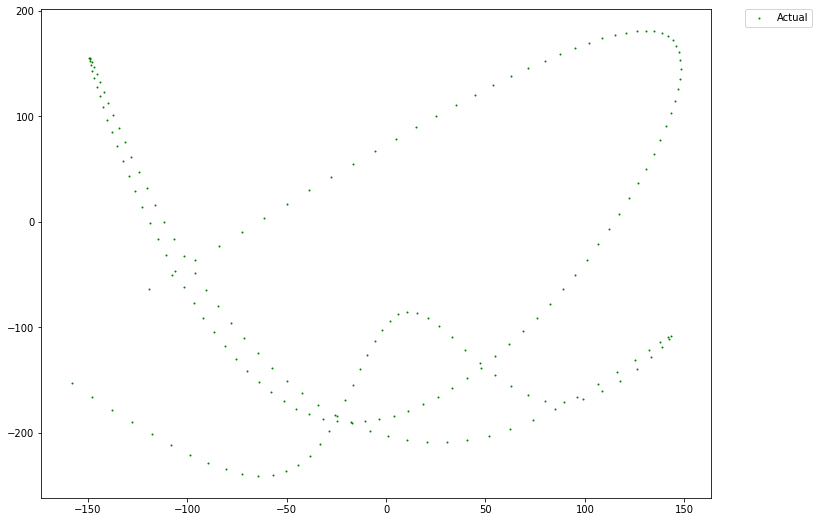

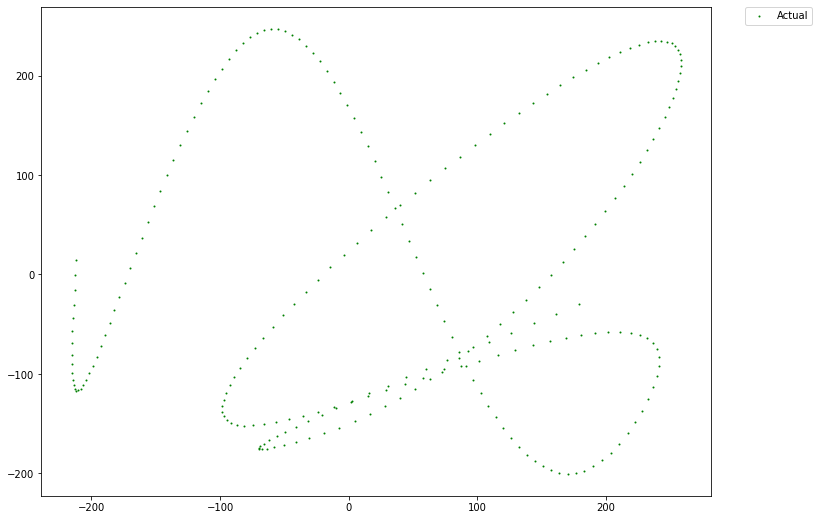

In [65]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj11['X'],traj11['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj12['X'],traj12['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj13['X'],traj13['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj14['X'],traj14['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj15['X'],traj15['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj16['X'],traj16['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [66]:
new_df = traj11


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.883026   0.967938 -0.914331  0.917543
2  -0.914331   0.917543 -0.942422  0.868817
3  -0.942422   0.868817 -0.964085  0.823430
4  -0.964085   0.823430 -0.976106  0.783050
5  -0.976106   0.783050 -0.975448  0.749243


Test RMSE: 10.743610


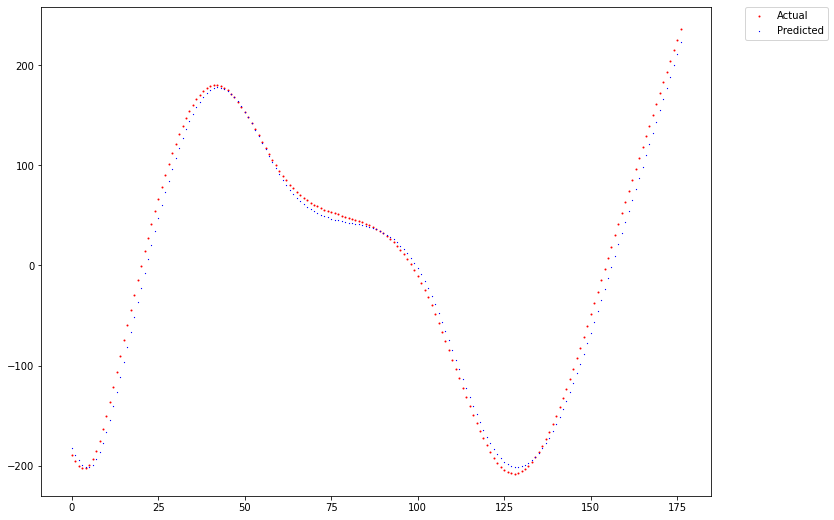

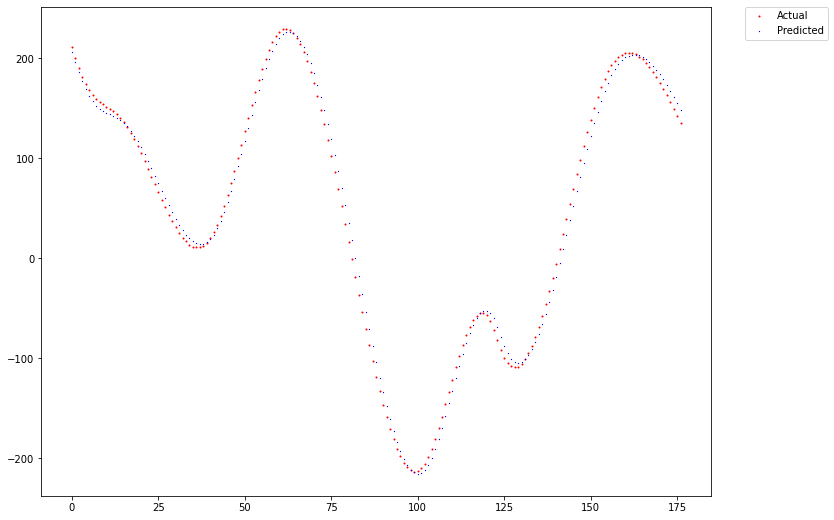

In [67]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



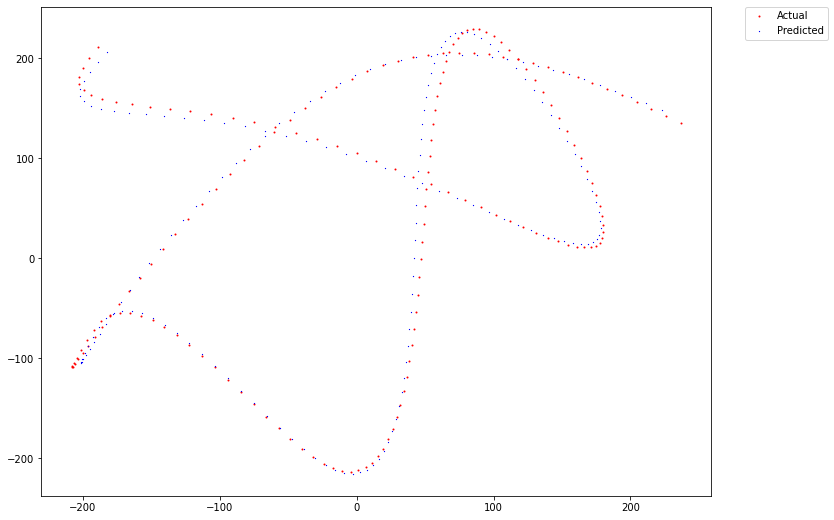

In [68]:
import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [69]:
new_df_2 = traj12
new_df_3 = traj13
new_df_4 = traj14
new_df_5 = traj15
new_df_6 = traj16



#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.146534  -0.597698 -0.068885 -0.611676
2  -0.068885  -0.611676  0.008405 -0.625519
3   0.008405  -0.625519  0.084976 -0.639090
4   0.084976  -0.639090  0.160468 -0.652255
5   0.160468  -0.652255  0.234522 -0.664877
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.392714   1.000000 -0.342182  0.926304
2  -0.342182   0.926304 -0.291823  0.852691
3  -0.291823   0.852691 -0.241811  0.779245
4  -0.241811   0.779245 -0.192319  0.706050
5  -0.192319   0.706050 -0.143521  0.633189
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.649599   0.200138  0.570997  0.170365
2   0.570997   0.170365  0.492560  0.140712
3   0.492560   0.140712  0.414455  0.111301
4   0.414455   0.111301  0.336846  0.082252
5   0.336846   0.082252  0.259898  0.053685
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000  -0.583905 -0.933241 -0.644573
2  -0.933241  -0.644573 -0.866822 -0.704086
3  -0.866822  -0.704086 -0.801081 -0.761288
4  -0.801081  -0.761288 -0.73635

In [70]:
frames = [reframed_2, reframed_3,reframed_4,reframed_5,reframed_6]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

var1(t-1)  var2(t-1)   var1(t)   var2(t)
1039  -0.998013  -0.360637 -0.996145 -0.302133
1040  -0.996145  -0.302133 -0.993817 -0.240292
1041  -0.993817  -0.240292 -0.991124 -0.175793
1042  -0.991124  -0.175793 -0.988159 -0.109318
1043  -0.988159  -0.109318 -0.985015 -0.041546

Test RMSE: 9.769335


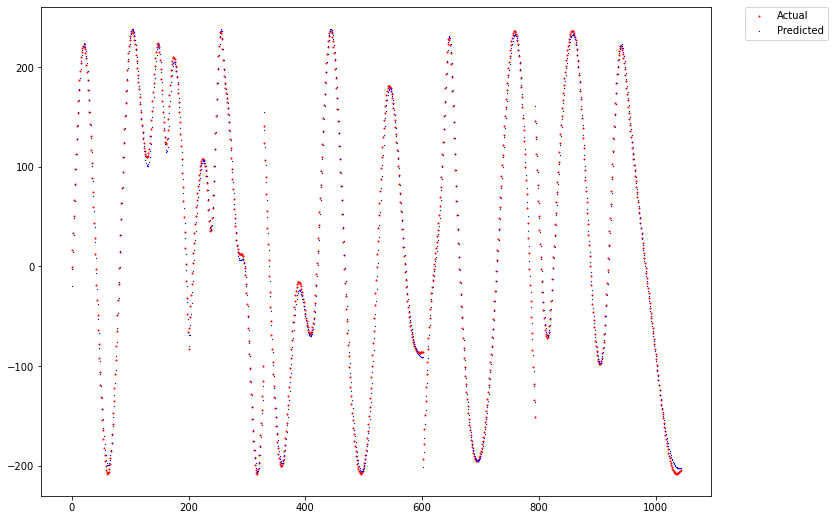

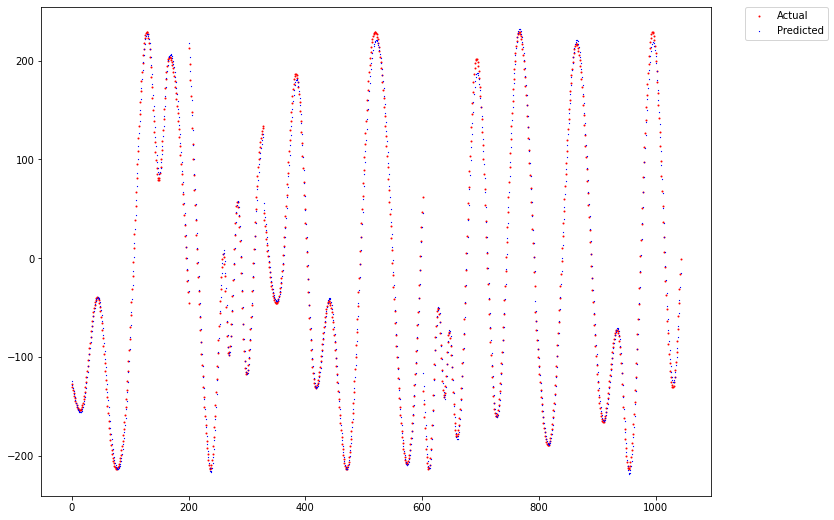

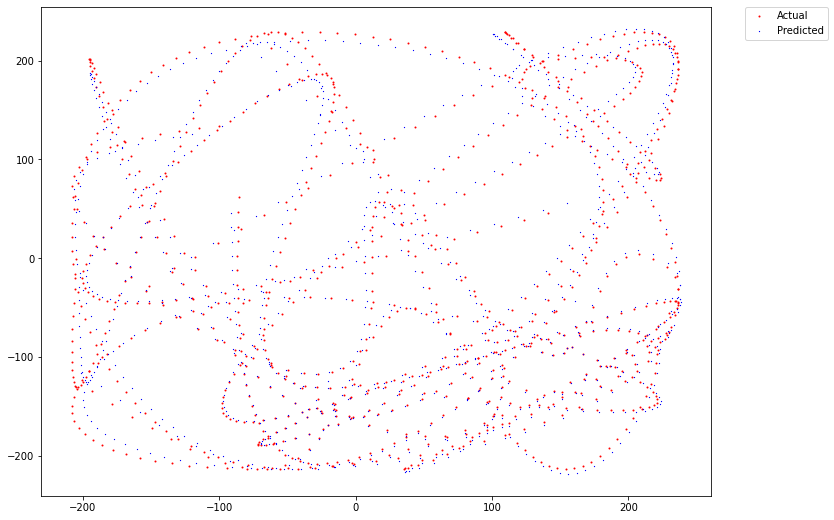

In [71]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# RMA with speed at 33.33 m/s

In [72]:
traj01 = pd.read_csv('UE0_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj02 = pd.read_csv('UE0_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj03 = pd.read_csv('UE1_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj04 = pd.read_csv('UE1_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj05 = pd.read_csv('UE2_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj06 = pd.read_csv('UE2_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj07 = pd.read_csv('UE3_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj08 = pd.read_csv('UE3_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj09 = pd.read_csv('UE4_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj10 = pd.read_csv('UE4_18-11-2021_23-53-21.csv', low_memory=False,  header=None)

traj01.columns = ["X", "Y", "Speed", "Time"]
traj02.columns = ["X", "Y", "Speed", "Time"]
traj03.columns = ["X", "Y", "Speed", "Time"]
traj04.columns = ["X", "Y", "Speed", "Time"]
traj05.columns = ["X", "Y", "Speed", "Time"]
traj06.columns = ["X", "Y", "Speed", "Time"]
traj07.columns = ["X", "Y", "Speed", "Time"]
traj08.columns = ["X", "Y", "Speed", "Time"]
traj09.columns = ["X", "Y", "Speed", "Time"]
traj10.columns = ["X", "Y", "Speed", "Time"]


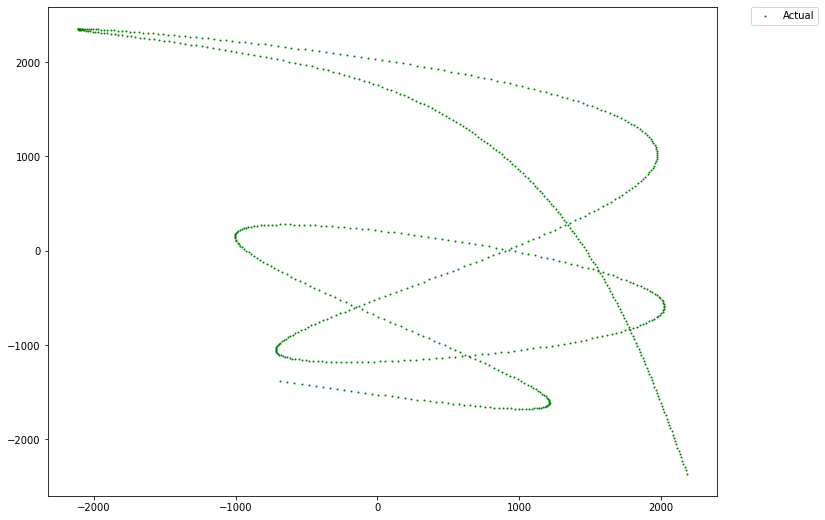

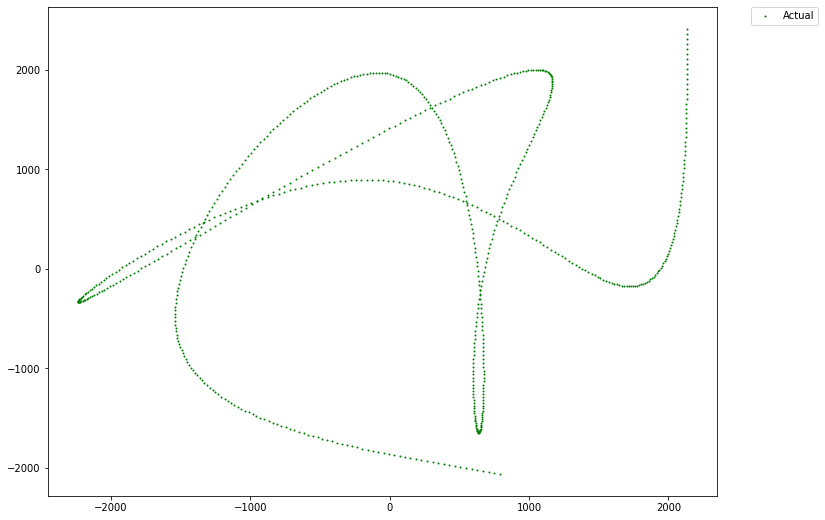

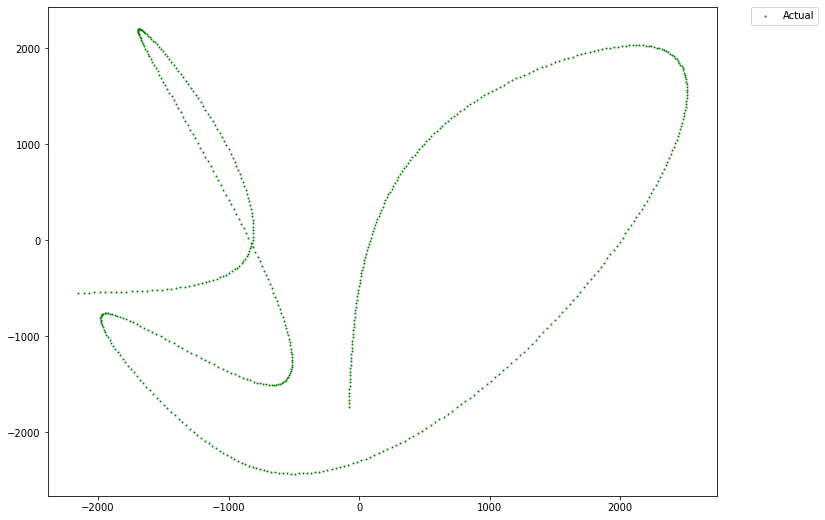

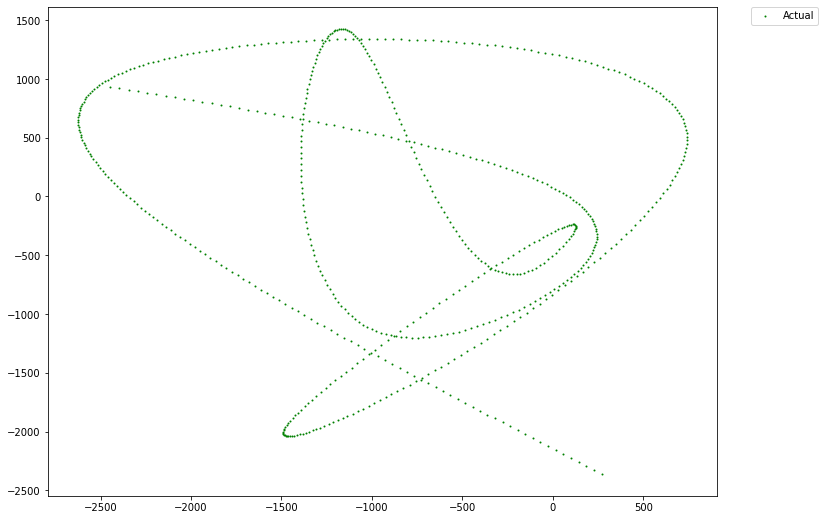

In [73]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj01['X'],traj01['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj03['X'],traj03['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj06['X'],traj06['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj10['X'],traj10['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [74]:
new_df_1 = traj01
new_df_2 = traj02
new_df_3 = traj03
new_df_4 = traj04
new_df_5 = traj05
new_df_6 = traj06
new_df_7 = traj07
new_df_8 = traj08
new_df_9 = traj09
new_df_10 = traj10


#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df_1[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


# load dataset
dataset = new_df_7[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler7 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler7.fit_transform(values)
# frame as supervised learning
reframed_7 = series_to_supervised(scaled, 1, 1)

print(reframed_7.head())

# load dataset
dataset = new_df_8[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler8 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler8.fit_transform(values)
# frame as supervised learning
reframed_8 = series_to_supervised(scaled, 1, 1)
print(reframed_8.head())

# load dataset
dataset = new_df_9[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler9 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler9.fit_transform(values)
# frame as supervised learning
reframed_9 = series_to_supervised(scaled, 1, 1)
print(reframed_9.head())

# load dataset
dataset = new_df_10[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler10 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler10.fit_transform(values)
# frame as supervised learning
reframed_10 = series_to_supervised(scaled, 1, 1)
print(reframed_10.head())

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.336627  -0.583678 -0.313062 -0.588220
2  -0.313062  -0.588220 -0.289513 -0.592756
3  -0.289513  -0.592756 -0.265993 -0.597282
4  -0.265993  -0.597282 -0.242517 -0.601791
5  -0.242517  -0.601791 -0.219101 -0.606279
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.067901  -0.995070 -0.059263 -0.975679
2  -0.059263  -0.975679 -0.050627 -0.956289
3  -0.050627  -0.956289 -0.041997 -0.936902
4  -0.041997  -0.936902 -0.033375 -0.917520
5  -0.033375  -0.917520 -0.024764 -0.898143
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.385964  -1.000000  0.367375 -0.995856
2   0.367375  -0.995856  0.348791 -0.991708
3   0.348791  -0.991708  0.330217 -0.987554
4   0.330217  -0.987554  0.311658 -0.983390
5   0.311658  -0.983390  0.293120 -0.979213
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.461185   0.117321 -0.478617  0.128497
2  -0.478617   0.128497 -0.496032  0.139661
3  -0.496032   0.139661 -0.513414 

In [75]:
frames = [reframed, reframed_2, reframed_3,reframed_4,reframed_5,reframed_6,reframed_7,reframed_8,reframed_9,reframed_10]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

# split into train and test sets
values = reframed.values
n_train = round(reframed.shape[0]*0.2)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-2], train[:, 2:]
test_X, test_y = test[:, :-2], test[:, 2:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1406, 1, 2) (1406, 2) (5625, 1, 2) (5625, 2)


Epoch 1/600
20/20 - 8s - loss: 0.4505 - accuracy: 0.8201 - val_loss: 0.4199 - val_accuracy: 0.8768
Epoch 2/600
20/20 - 0s - loss: 0.3748 - accuracy: 0.9161 - val_loss: 0.3428 - val_accuracy: 0.9239
Epoch 3/600
20/20 - 0s - loss: 0.2899 - accuracy: 0.9431 - val_loss: 0.2515 - val_accuracy: 0.9460
Epoch 4/600
20/20 - 0s - loss: 0.1916 - accuracy: 0.9637 - val_loss: 0.1494 - val_accuracy: 0.9627
Epoch 5/600
20/20 - 0s - loss: 0.0934 - accuracy: 0.9772 - val_loss: 0.0465 - val_accuracy: 0.9774
Epoch 6/600
20/20 - 0s - loss: 0.0286 - accuracy: 0.9929 - val_loss: 0.0163 - val_accuracy: 0.9924
Epoch 7/600
20/20 - 0s - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0163 - val_accuracy: 0.9931
Epoch 8/600
20/20 - 0s - loss: 0.0195 - accuracy: 0.9943 - val_loss: 0.0130 - val_accuracy: 0.9913
Epoch 9/600
20/20 - 0s - loss: 0.0202 - accuracy: 0.9908 - val_loss: 0.0138 - val_accuracy: 0.9924
Epoch 10/600
20/20 - 0s - loss: 0.0195 - accuracy: 0.9929 - val_loss: 0.0129 - val_accuracy: 0.9920
Epoch 11/

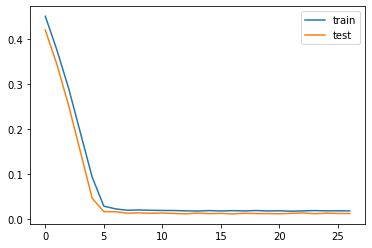

In [76]:
from keras.layers import Bidirectional

# design network
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto', patience=10,restore_best_weights=True)
model1 = Sequential()
model1.add(Bidirectional(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2]))))
model1.add(Dropout(0.1))
model1.add(Dense(test_y.shape[1]))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])

# fit network
history1 = model1.fit(train_X, train_y, epochs=600, callbacks=[callback], batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [77]:
yhat = model1.predict(test_X)
Loss, accuracy = model1.evaluate(test_X, test_y)
print('Accuracy: %.4f' % (accuracy*100))

# calculate Loss
print('Loss: %.6f' % Loss)

176/176 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9927
Accuracy: 99.2711
Loss: 0.011410


In [78]:
# make a prediction
yhat = model1.predict(test_X)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)

# make a prediction
yhat2 = model1.predict(train_X)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmseL = rmse
print('Test RMSE: %.6f' % rmse)

# invert scaling for forecast
inv_yhat2 = scaler.inverse_transform(yhat2)
# invert scaling for actual
inv_y2 = scaler.inverse_transform(train_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Train RMSE: %.6f' % rmse)

import numpy as np
inv_f = np.concatenate((inv_yhat2, inv_yhat), axis=0)
inv_f

inv_o = np.concatenate((inv_y2, inv_y), axis=0)
inv_f,inv_o

Test RMSE: 30.410962
Train RMSE: 27.584458


(array([[ -682.63745, -1377.3248 ],
        [ -631.8441 , -1388.1565 ],
        [ -581.0687 , -1398.96   ],
        ...,
        [ 1425.9679 , -2217.9106 ],
        [ 1479.3601 , -2258.3335 ],
        [ 1532.7051 , -2298.6877 ]], dtype=float32),
 array([[ -636.4114 , -1391.7083 ],
        [ -585.85455, -1402.4039 ],
        [ -535.3616 , -1413.0743 ],
        ...,
        [ 1472.6523 , -2278.9023 ],
        [ 1526.782  , -2320.7615 ],
        [ 1580.9297 , -2362.6262 ]], dtype=float32))

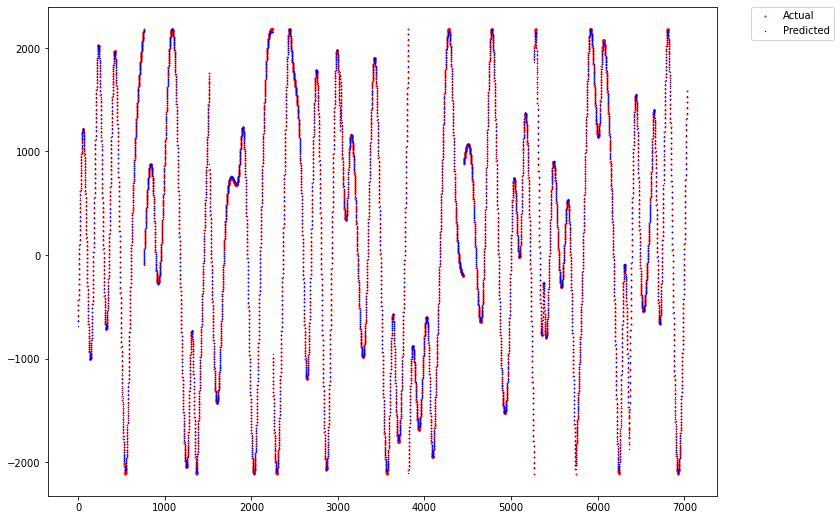

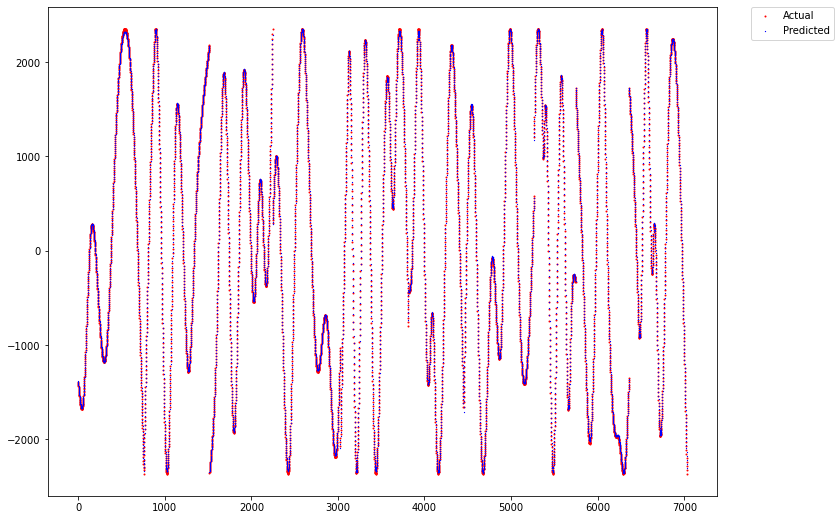

In [79]:
fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [80]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,0], inv_yhat2[:,0]))
print('RMSE for X in Train dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,1], inv_yhat2[:,1]))
print('RMSE for Y in Train dataset: %.6f' % rmse)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('RMSE for X in Test dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('RMSE for Y in Test dataset: %.6f' % rmse)

RMSE for X in Train dataset: 27.051237
RMSE for Y in Train dataset: 28.107589
RMSE for X in Test dataset: 27.246546
RMSE for Y in Test dataset: 33.275784


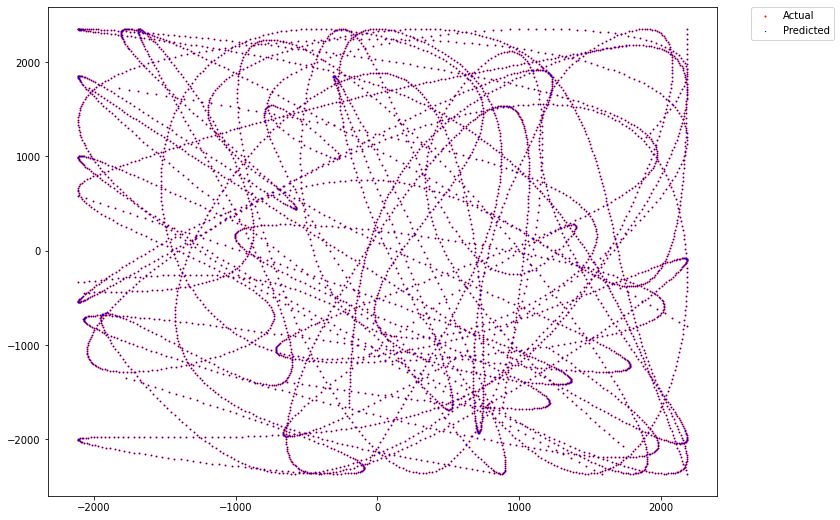

In [81]:

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Feed random 6 paths to ML for predicting

In [82]:
traj11 = pd.read_csv('UE5_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj12 = pd.read_csv('UE5_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj13 = pd.read_csv('UE6_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj14 = pd.read_csv('UE7_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj15 = pd.read_csv('UE8_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj16 = pd.read_csv('UE9_18-11-2021_23-53-04.csv', low_memory=False,  header=None)

traj11.columns = ["X", "Y", "Speed", "Time"]
traj12.columns = ["X", "Y", "Speed", "Time"]
traj13.columns = ["X", "Y", "Speed", "Time"]
traj14.columns = ["X", "Y", "Speed", "Time"]
traj15.columns = ["X", "Y", "Speed", "Time"]
traj16.columns = ["X", "Y", "Speed", "Time"]

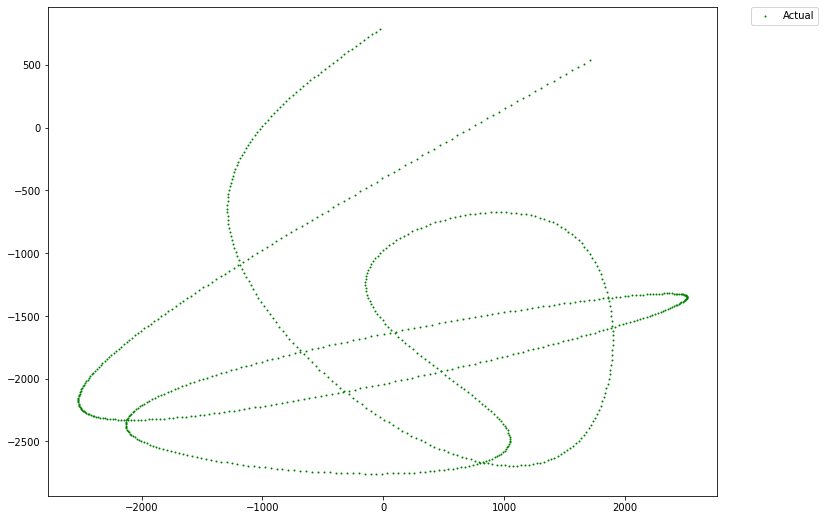

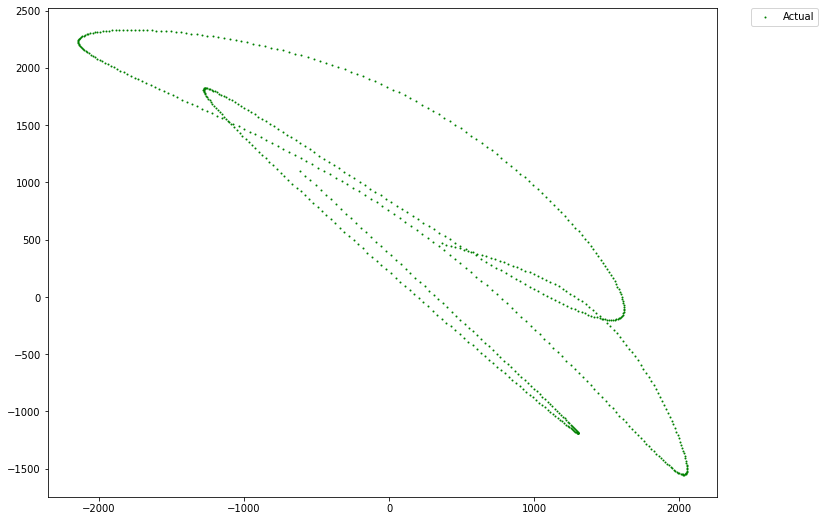

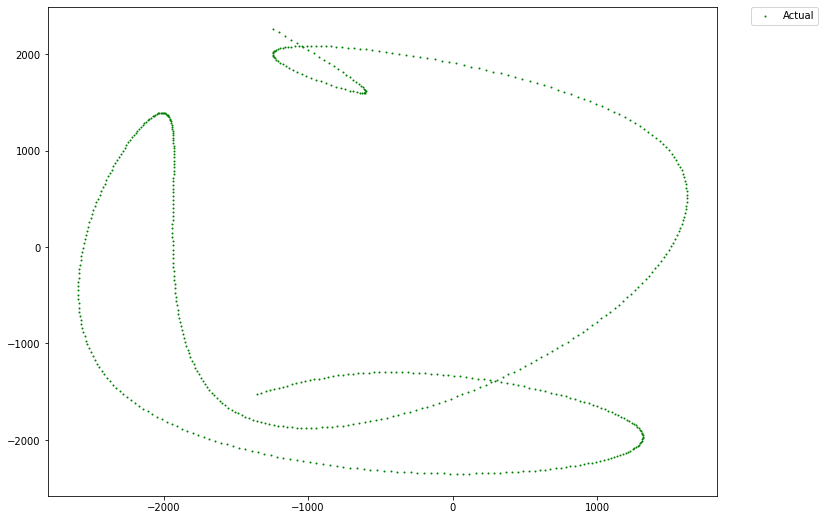

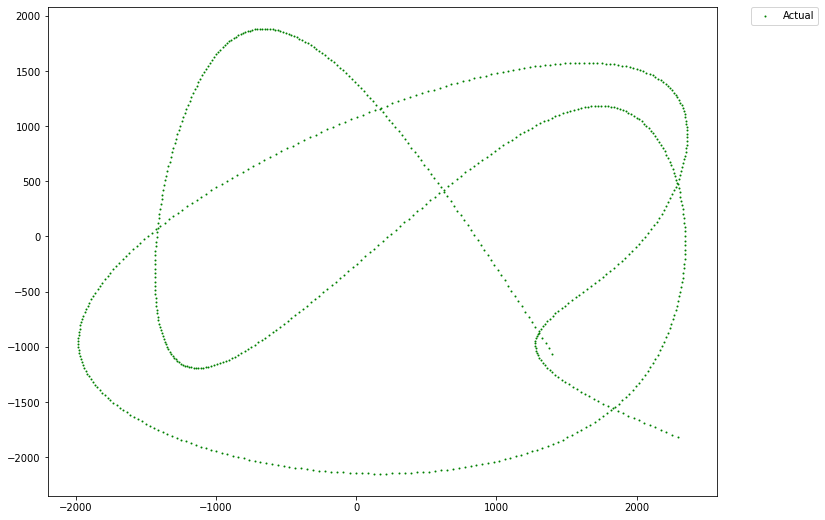

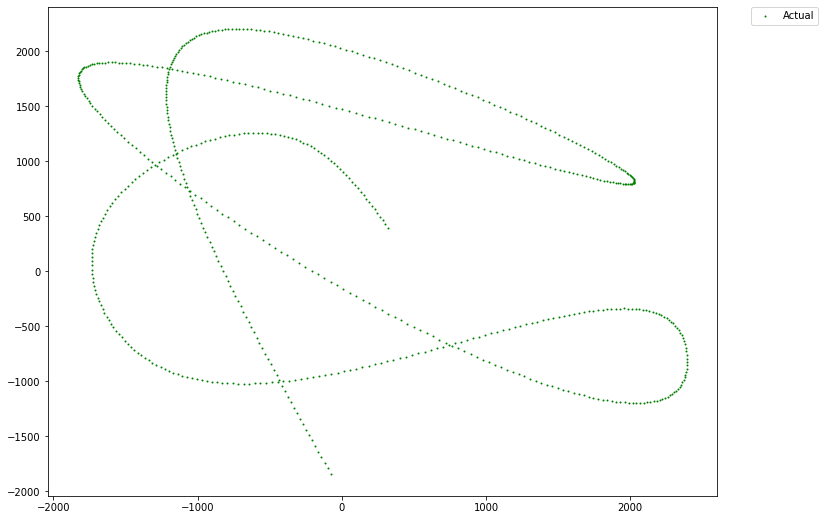

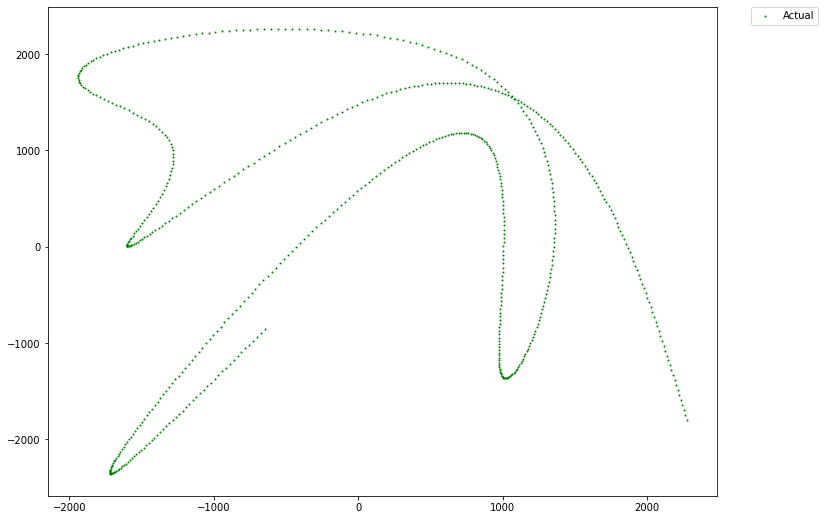

In [83]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj11['X'],traj11['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj12['X'],traj12['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj13['X'],traj13['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj14['X'],traj14['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj15['X'],traj15['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj16['X'],traj16['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [84]:
new_df = traj11


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.007235   1.000000 -0.020468  0.987268
2  -0.020468   0.987268 -0.033693  0.974534
3  -0.033693   0.974534 -0.046902  0.961794
4  -0.046902   0.961794 -0.060086  0.949046
5  -0.060086   0.949046 -0.073238  0.936288


Test RMSE: 28.093843


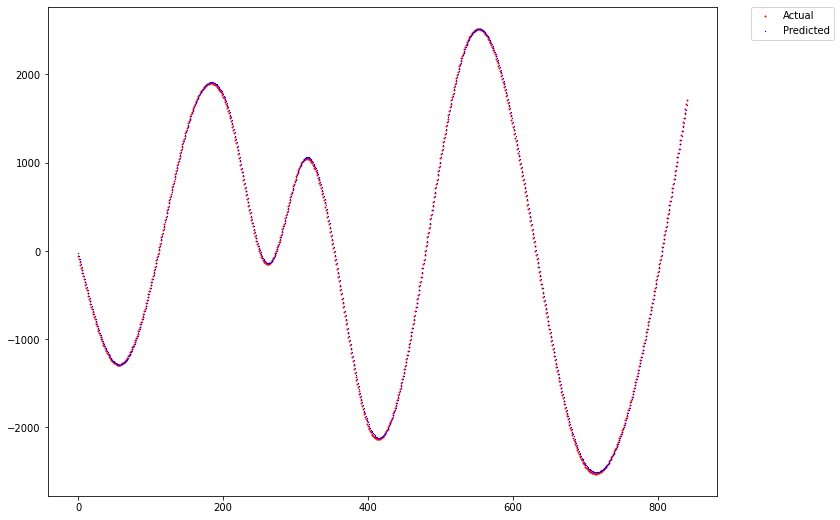

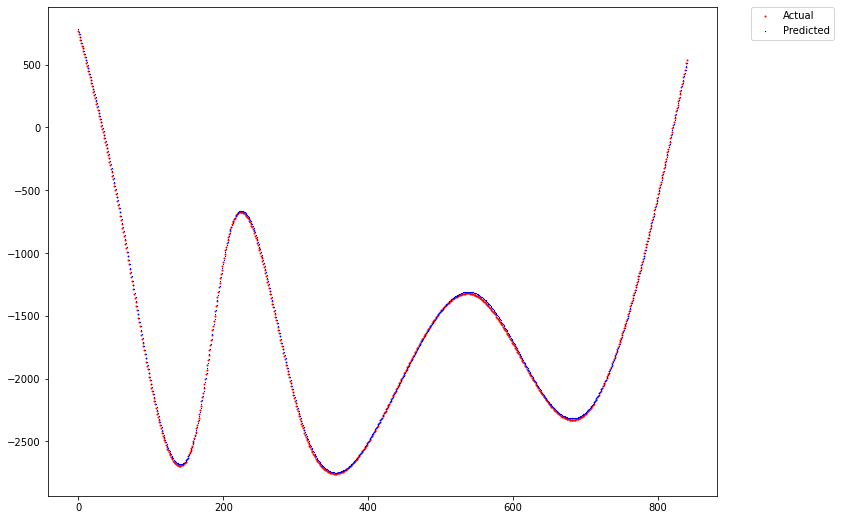

In [85]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



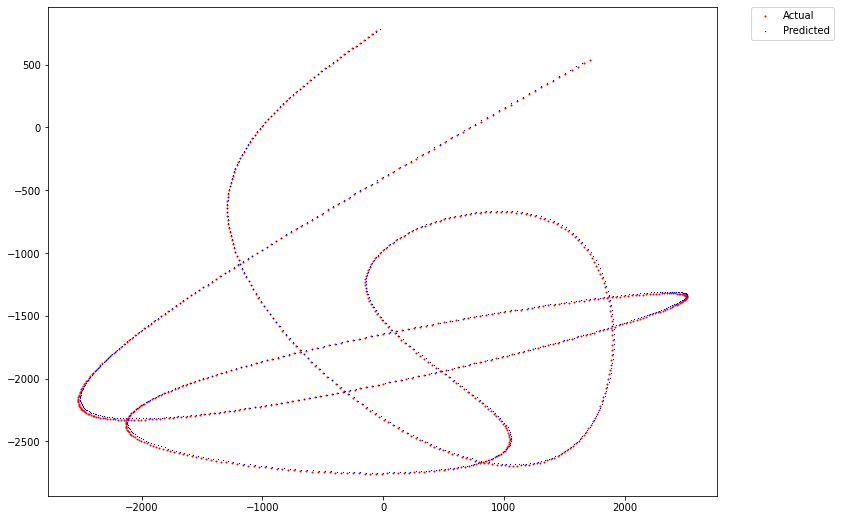

In [86]:
import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [87]:
new_df_2 = traj12
new_df_3 = traj13
new_df_4 = traj14
new_df_5 = traj15
new_df_6 = traj16



#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.193600   0.040214  0.208384  0.034464
2   0.208384   0.034464  0.223163  0.028703
3   0.223163   0.028703  0.237933  0.022917
4   0.237933   0.022917  0.252690  0.017096
5   0.252690   0.017096  0.267429  0.011227
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.358560   1.000000 -0.339068  0.983772
2  -0.339068   0.983772 -0.319647  0.967590
3  -0.319647   0.967590 -0.300369  0.951499
4  -0.300369   0.951499 -0.281308  0.935545
5  -0.281308   0.935545 -0.262534  0.919775
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.557885  -0.460778  0.546653 -0.437089
2   0.546653  -0.437089  0.535421 -0.413406
3   0.535421  -0.413406  0.524191 -0.389734
4   0.524191  -0.389734  0.512964 -0.366079
5   0.512964  -0.366079  0.501738 -0.342445
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.017904   0.105552  0.009089  0.122147
2   0.009089   0.122147  0.000266  0.138720
3   0.000266   0.138720 -0.008575  0.155248
4  -0.008575   0.155248 -0.01744

Test RMSE: 29.834959


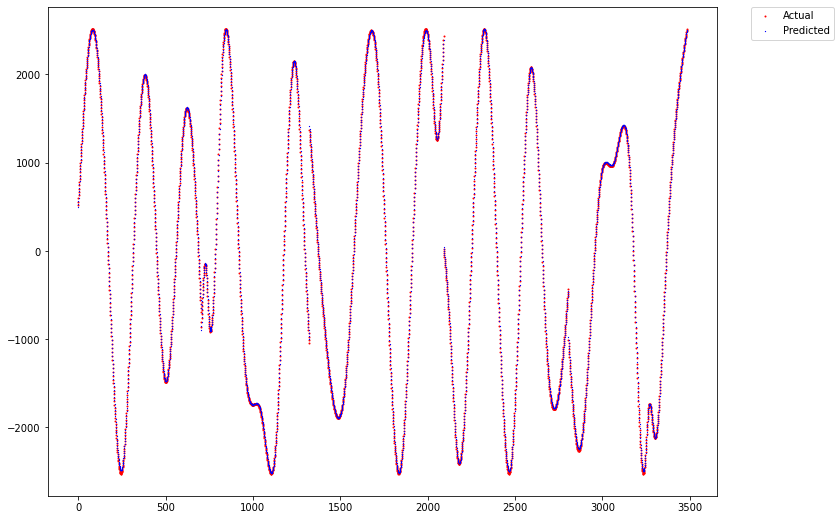

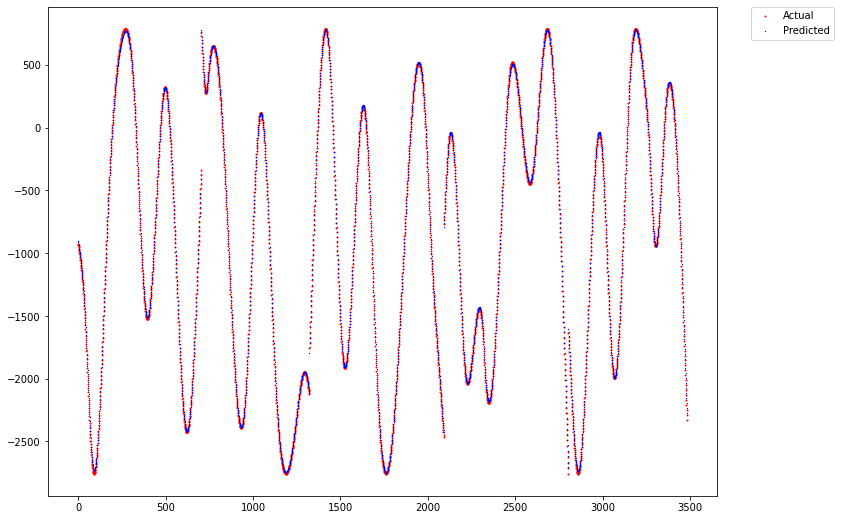

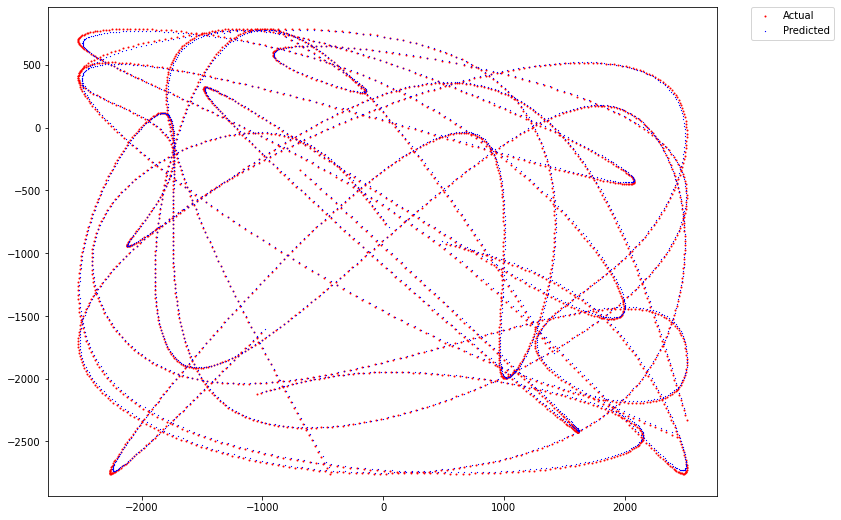

In [88]:
frames = [reframed_2, reframed_3,reframed_4,reframed_5,reframed_6]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()